In [46]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
from WindPy import w

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from Util_Fin import easy_manager
# follow 20230614-国泰海通-大类资产配置量化模型研究系列之四：基于宏观因子的大类资产配置框架

import statsmodels.api  as sm 
from statsmodels.stats.outliers_influence  import variance_inflation_factor

from Util_Fin.PCAanalysis import PCAAnalyzer
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
 

In [47]:
w.start()

.ErrorCode=0
.Data=[Already connected!]

# PCA

In [619]:
'''
step 1:
选取合适的因子
先使用PCA的确定因子的范围,需要PCA的时序:
沪深300 - 000300.SH
中证500 - 000905.SH
国债 - 000012.SH
企业债 - 399481.SZ
南华商品 - NH0100.NHF
沪金 - AU9999.SGE
布伦特原油 - EBD:
'''
wsd_list = ['000300.SH','000905.SH','000012.SH','399481.SZ','NH0100.NHF','AU9999.SGE']
str = ','.join(wsd_list)
wsd_data = w.wsd(str,'close','2009-01-01','2022-12-31',usedf=True)[1]
edb_data = w.edb("S0260036", "2009-01-01", "2022-12-31","Fill=Previous",usedf=True)[1]
# wsd_data
# edb_data

In [106]:
price_data = pd.merge(wsd_data,edb_data,left_index=True,right_index=True)
price_data.columns = ['沪深300','中证500','国债','企业债','南华商品','沪金','布伦特原油']
price_data

,沪深300,中证500,国债,企业债,南华商品,沪金,布伦特原油
2009-01-12,1920.6870,2137.8410,121.1650,131.5850,954.8930,188.59,42.96
2009-01-13,1876.1850,2081.6720,121.1400,131.7000,928.8248,181.81,43.67
2009-01-14,1955.2440,2160.0640,120.9840,131.5010,956.9886,182.99,45.60
2009-01-15,1954.8740,2181.0610,120.8020,131.4530,942.0633,180.33,47.19
2009-01-16,1990.2140,2195.6340,120.7110,131.0790,958.1233,182.47,48.76
...,...,...,...,...,...,...,...
2022-12-26,3843.4887,5843.2555,198.4439,126.3299,2340.0500,407.53,84.62
2022-12-27,3887.8540,5885.6622,198.4789,126.3222,2373.7700,407.98,85.54
2022-12-28,3871.2644,5862.0967,198.4180,126.3236,2361.2300,408.99,82.96
2022-12-29,3856.7007,5857.4021,198.4806,126.3138,2356.4100,407.19,82.25


In [107]:
ret_data = price_data.pct_change().dropna()
ret_data

,沪深300,中证500,国债,企业债,南华商品,沪金,布伦特原油
2009-01-13,-0.023170,-0.026274,-0.000206,8.739598e-04,-0.027300,-0.035951,0.016527
2009-01-14,0.042138,0.037658,-0.001288,-1.511010e-03,0.030322,0.006490,0.044195
2009-01-15,-0.000189,0.009721,-0.001504,-3.650162e-04,-0.015596,-0.014536,0.034868
2009-01-16,0.018078,0.006682,-0.000753,-2.845123e-03,0.017048,0.011867,0.033270
2009-01-19,0.011180,-0.001288,-0.000422,1.022284e-03,0.002302,0.014961,-0.082034
...,...,...,...,...,...,...,...
2022-12-26,0.003989,0.013865,0.001135,-1.282192e-04,0.012855,-0.003667,0.001302
2022-12-27,0.011543,0.007257,0.000176,-6.095152e-05,0.014410,0.001104,0.010872
2022-12-28,-0.004267,-0.004004,-0.000307,1.108277e-05,-0.005283,0.002476,-0.030161
2022-12-29,-0.003762,-0.000801,0.000315,-7.757854e-05,-0.002041,-0.004401,-0.008558


In [108]:
from Util_Fin.PCAanalysis import PCAAnalyzer
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

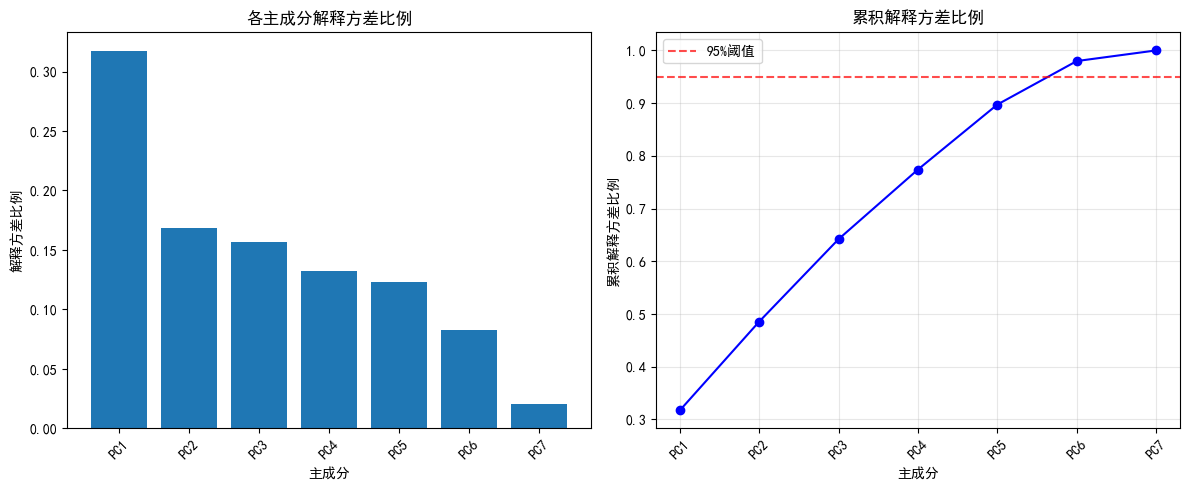

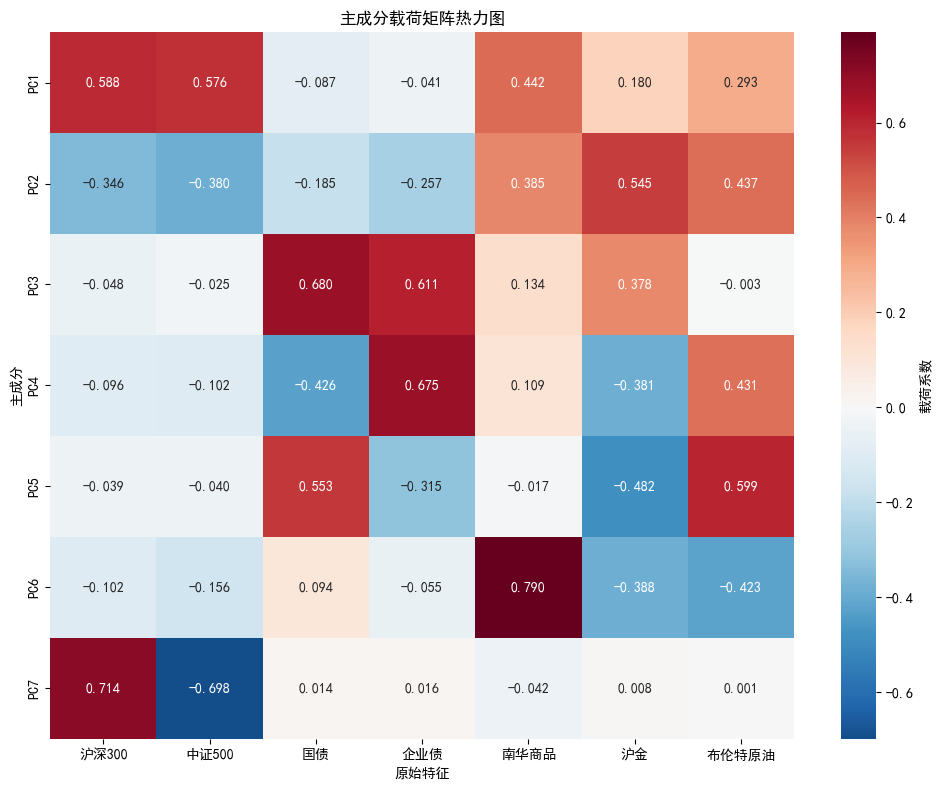

'\n分析各个主成分可以得到:\n第一主成分对应经济增长风险\n第二主成分对应利率风险\n第三主成分对应汇率风险\n第四主成分对应通胀风险\n第五主成分难以判断\n第六主成分对应信用风险\n第七主成分对应流动性风险\n'

In [109]:
pca_analyzer = PCAAnalyzer(standardize=True)
pca_analyzer.fit(ret_data)

# 获取分析结果
summary = pca_analyzer.get_summary_statistics()
components = pca_analyzer.get_components_matrix()

# 可视化
pca_analyzer.plot_explained_variance()
pca_analyzer.plot_components_heatmap()
'''
分析各个主成分可以得到:
第一主成分对应经济增长风险
第二主成分对应利率风险
第三主成分对应汇率风险
第四主成分对应通胀风险
第五主成分难以判断
第六主成分对应信用风险
第七主成分对应流动性风险
'''

# 低频因子构建

In [88]:
'''
PCA的结果并不稳定，其主要用途是用于确定宏观因子的数量与范围;
对于宏观资产的构造，在国外使用较多的是通过构造模拟资产的方式来拟合宏观指标。
因此在使用PCA找到原始宏观因子以后，我们需要做一下几点：
1. 寻找合适的的宏观经济原始指标
2. 选择资产组合来拟合原始经济指标
follow国泰海通，在经济原始指标选取中，考虑如下：
1.增长因子：考虑将PMI的同比差分(M0017126*)、
          固定资产投资额完成额同比(累计同比M0000273,累计值M0000272)、
          社会消费品零售总额同比(当月同比M0001428,累计同比M0001440)、
          进出口金额同比(当月同比M0000605,累计同比M0043657)四个同比指标根据波动率进行加权构造
2.通胀因子：使用CPI同比(当月同比M0000612,累计同比M0000729)和PPI同比(当月同比M0001227,累计同比M0001244)按波动率倒数进行加权构造
3.利率因子：使用10年期国债收益率(S0059749)表示
4.信用因子：使用3年期AA中短期票据收益率(S0059717)和3年期国开债收益率(M1004265)的差来刻画信用利差的变化
5.汇率因子：使用美元指数(M0000271)来代替汇率因子
6.流动性因子：使用M2同比(M0001385)和社融存量同比(M5525763)的差来构造
'''
# macro_data = w.edb("M0017126,M0000272,M0000273,M0001428,M0001440,M0000605,M0043657,M0000612,M0001227,M0001244,M0000729,S0059749,S0059717,M1004265,M0000271,M0001385,M5525763",
#                     "2005-01-30", 
#                     "2025-11-18",
#                     "Fill=Previous",
#                     "Period=M",
#                     usedf=True)[1]
with easy_manager.EasyManager(database='macro_data_base') as em:
    macro_data = em.load_table('raw_macro_data_m',order_by='index',ascending=True)
    macro_data.set_index('index',inplace=True)
    macro_data.index = pd.to_datetime(macro_data.index)
    macro_data = macro_data.loc[:"2023-05-31"]

2025-11-24 14:30:31,246 - datadeal_20251124 - INFO - 数据库连接成功: macro_data_base
2025-11-24 14:30:31,247 - datadeal_20251124 - INFO - [Function: load_table started...]
2025-11-24 14:30:31,257 - datadeal_20251124 - INFO - 按列 'index' 升序排序
2025-11-24 14:30:31,261 - datadeal_20251124 - INFO - 成功从表 raw_macro_data_m 加载数据，形状: (245, 14)
2025-11-24 14:30:31,262 - datadeal_20251124 - INFO - [Function: load_table completed, elapsed time: 0.01s]
2025-11-24 14:30:31,265 - datadeal_20251124 - INFO - 数据库连接已关闭


In [89]:
macro_data['delta_M0017126'] = macro_data['M0017126'].diff(12)
macro_data_M = macro_data.resample('M').last().dropna(how='all')
#处理当月同比固定资产完成额
# sub = macro_data_M[['M0000272','M0000273']]
# sub.loc[(sub.index.month == 1),['M0000272']] = np.nan
# sub.fillna(method='bfill',inplace=True)
# sub.loc[(sub.index.month == 1),['M0000272']] = (sub.loc[(sub.index.month == 1),['M0000272']]/2)
# sub['lag_M0000272']=(sub.groupby(sub.index.year).shift(1))['M0000272']
# sub.loc[(sub.index.month == 1),['lag_M0000272']] = 0
# sub['delta_M0000272'] = sub['M0000272'] - sub['lag_M0000272']
# sub['yoy_M0000272'] = sub['delta_M0000272'].pct_change(12)
# macro_data_M['yoy_M0000272'] = sub['yoy_M0000272']*100
# macro_data_M = macro_data_M.iloc[:-1]

In [92]:
Growth.dropna()

,delta_M0017126,M0000273,M0001428,M0000605
index,,,,
2006-06-30,2.4,31.3,13.900000,21.300000
2006-07-31,1.3,30.5,13.700000,21.300000
2006-08-31,0.5,29.1,13.800000,29.000000
2006-09-30,1.9,28.2,13.900000,26.600000
2006-10-31,0.6,26.8,14.348977,22.900000
...,...,...,...,...
2023-01-31,0.0,5.3,0.850000,-15.917877
2023-02-28,2.4,5.5,3.500000,0.457592
2023-03-31,2.4,5.1,10.600000,4.958778


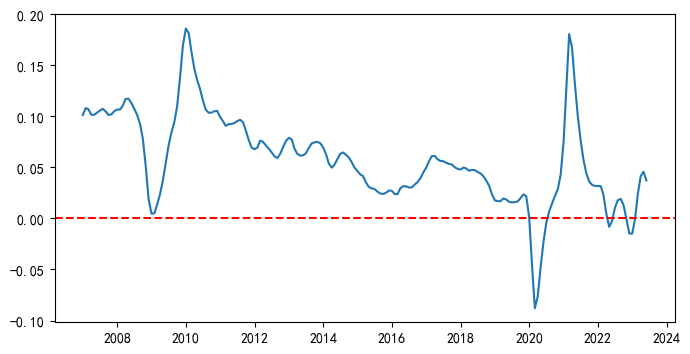

In [101]:
#增长因子
from statsmodels.tsa.filters.hp_filter  import hpfilter
Growth = macro_data_M[['delta_M0017126','M0000273','M0001428','M0000605']]
'''
Growh数据需要处理一月二月数据合并导致的缺失数据
'''
Growth.loc[(Growth.index.month == 1),['M0000273','M0001428']] = np.nan
Growth.fillna(Growth.interpolate(),inplace=True)

Growth = Growth.loc["2006-12-01":]
Growth_Dup = Growth.copy()

lambda_param = 1  # 根据数据频率调整
for column in Growth.columns: 
    # 提取序列 
    series = Growth[column]
    # 应用HP滤波 
    cycle, trend = hpfilter(series, lamb=lambda_param)
    # 将结果添加到DataFrame 
    Growth[f'{column}'] = trend
weight = ((1/Growth.std()))/((1/Growth.std()).sum())
Growth_f = ((weight*Growth).sum(axis=1)/100)
plt.figure(figsize=(8,4)) 
plt.plot(Growth_f)
plt.yticks(np.arange(-0.1,0.25,0.05))
plt.axhline(y=0,xmin=0,xmax=len(Growth_f),color='r',linestyle='--')

([<matplotlib.axis.YTick at 0x2b81d1a3750>,
 [Text(0, -0.06, '-0.06'),
  Text(0, -0.039999999999999994, '-0.04'),
  Text(0, -0.01999999999999999, '-0.02'),
  Text(0, 1.3877787807814457e-17, '0.00'),
  Text(0, 0.020000000000000018, '0.02'),
  Text(0, 0.04000000000000002, '0.04'),
  Text(0, 0.060000000000000026, '0.06'),
  Text(0, 0.08000000000000002, '0.08'),
  Text(0, 0.10000000000000003, '0.10')])

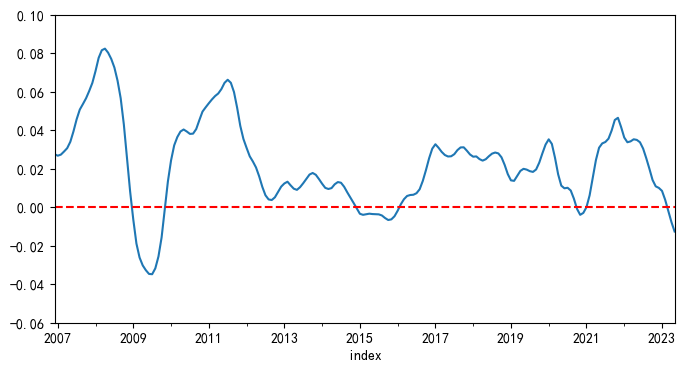

In [113]:
#通胀因子
Inflation = macro_data_M[['M0000612','M0001227']].loc['2006-12-31':]
lambda_param = 1  # 根据数据频率调整
for column in Inflation.columns: 
    # 提取序列 
    series = Inflation[column]
    # 应用HP滤波 
    cycle, trend = hpfilter(series, lamb=lambda_param)
    # 将结果添加到DataFrame 
    Inflation[f'{column}'] = trend
weight = (1/(Inflation.std()))/(1/(Inflation.std())).sum()
Inflation_f = ((weight*Inflation).sum(axis=1)/100)
Inflation_f.plot(figsize=(8,4))
plt.axhline(y=0,xmin=0,xmax=len(Inflation_f),color='r',linestyle='--')
plt.yticks(np.arange(-0.06,0.12,0.02))

([<matplotlib.axis.YTick at 0x2b81d465a90>,
 [Text(0, 0.02, '0.020'),
  Text(0, 0.025, '0.025'),
  Text(0, 0.030000000000000002, '0.030'),
  Text(0, 0.035, '0.035'),
  Text(0, 0.04000000000000001, '0.040'),
  Text(0, 0.045000000000000005, '0.045'),
  Text(0, 0.05, '0.050')])

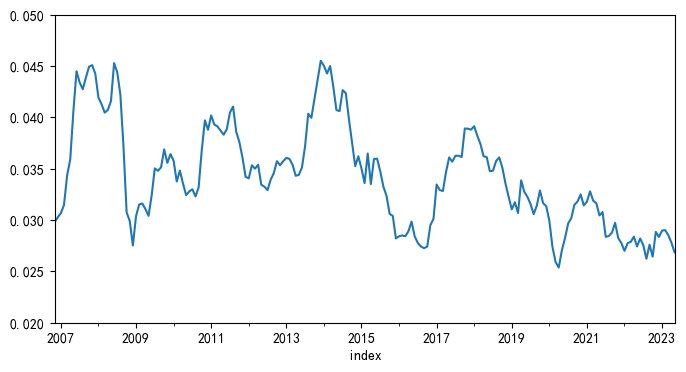

In [117]:
#利率因子
Intr = macro_data_M['S0059749'].loc['2006-11-30':]
Intr_f = Intr/100
Intr_f.plot(figsize=(8,4))
plt.yticks(np.arange(0.02,0.054,0.005))

([<matplotlib.axis.YTick at 0x2b81e9d1450>,
 [Text(0, 0.0, '0.000'),
  Text(0, 0.005, '0.005'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.015, '0.015'),
  Text(0, 0.02, '0.020'),
  Text(0, 0.025, '0.025'),
  Text(0, 0.03, '0.030'),
  Text(0, 0.035, '0.035')])

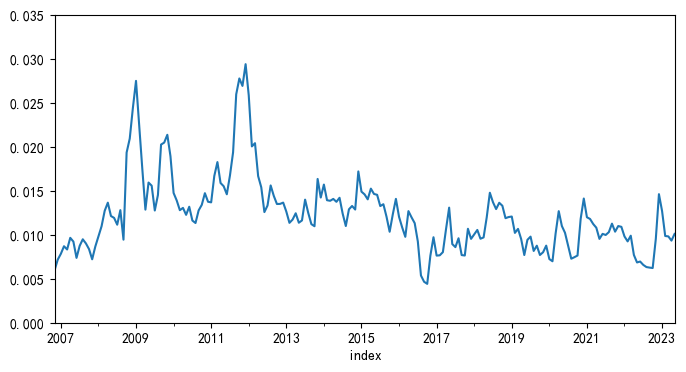

In [124]:
#信用因子
Credit = macro_data_M[['S0059717','M1004265']]
Credit.loc['2006-12-23':"2008-04-22",'S0059717',] = np.nan
linear_value = np.linspace(Credit.loc['2006-11-30','S0059717'], Credit.loc['2008-04-30','S0059717'], len(Credit['2006-11-30':'2008-04-30']))
Credit.loc['2006-12-23':"2008-04-22",'S0059717',] = linear_value[1:-1]
Credit_f = ((Credit['S0059717'] - Credit['M1004265'])/100).loc['2006-11-30':]
Credit_f.plot(figsize=(8,4))
plt.yticks(np.arange(0,0.036,0.005))

([<matplotlib.axis.YTick at 0x2b81e8b9f90>,
 [Text(0, 60, '60'),
  Text(0, 70, '70'),
  Text(0, 80, '80'),
  Text(0, 90, '90'),
  Text(0, 100, '100'),
  Text(0, 110, '110'),
  Text(0, 120, '120')])

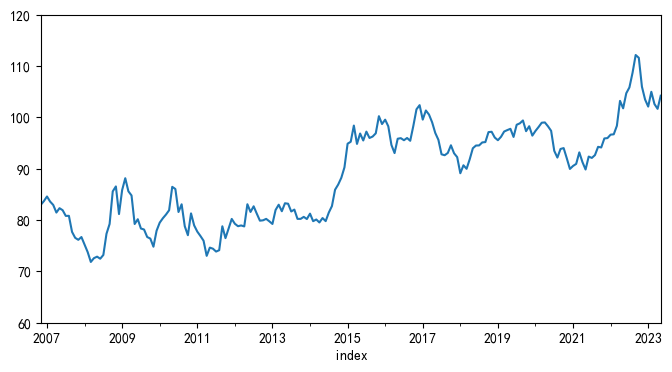

In [127]:
#汇率因子
exchange = macro_data_M['M0000271'].loc['2006-11-30':]
exchange_f = exchange
exchange_f.plot(figsize=(8,4))
plt.yticks(np.arange(60,121,10))

([<matplotlib.axis.YTick at 0x2b81ed3c410>,
 [Text(0, -0.16, '-0.16'),
  Text(0, -0.14, '-0.14'),
  Text(0, -0.12000000000000002, '-0.12'),
  Text(0, -0.10000000000000003, '-0.10'),
  Text(0, -0.08000000000000004, '-0.08'),
  Text(0, -0.06000000000000005, '-0.06'),
  Text(0, -0.04000000000000006, '-0.04'),
  Text(0, -0.020000000000000073, '-0.02'),
  Text(0, -8.326672684688674e-17, '0.00'),
  Text(0, 0.019999999999999907, '0.02'),
  Text(0, 0.0399999999999999, '0.04')])

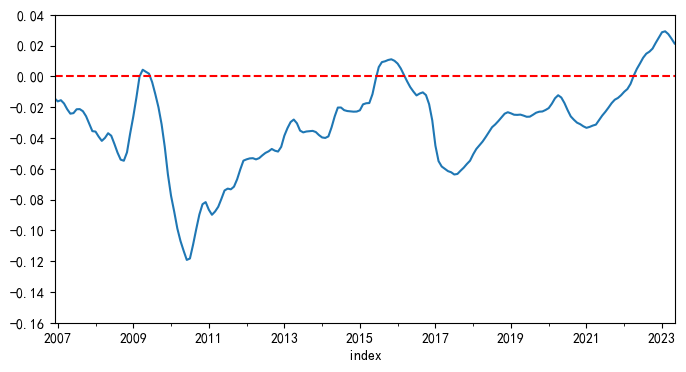

In [131]:
#流动性因子
liquidity = macro_data_M[['M0001385', 'M5525763']].loc['2006-12-30':]
k = (liquidity.loc["2006-12-31":"2014-12-31"]['M5525763'])
k.loc[k.index.month != 12] = np.nan
k = k.interpolate()
liquidity.update(k)
j = (liquidity.loc["2014-12-31":"2015-12-31"]['M5525763'])
j.loc[~j.index.month.isin([12,3,6,9])] = np.nan
j = j.interpolate()
liquidity.update(j)
lambda_param = 1 # 根据数据频率调整
for column in liquidity.columns: 
    # 提取序列 
    series = liquidity[column]
    # 应用HP滤波 
    cycle, trend = hpfilter(series, lamb=lambda_param)
    # 将结果添加到DataFrame 
    liquidity [f'{column}'] = trend
liquidity_f = (liquidity['M0001385'] - liquidity['M5525763'])/100
liquidity_f.plot(figsize=(8,4))
plt.axhline(y=0,xmin=0,xmax=len(liquidity_f),color='r',linestyle='--')
plt.yticks(np.arange(-0.16,0.05,0.02))

In [133]:
Macro_raw_factor = pd.concat([Growth_f,Inflation_f,Intr_f,Credit_f,exchange_f,liquidity_f], axis=1)
Macro_raw_factor.columns = ['Growth','Inflation','Interest','Credit','Exchange','Liquidity']
Macro_raw_factor.to_csv('macro.csv')
Macro_raw_factor.dropna(inplace=True)

In [134]:
with easy_manager.EasyManager(database='macro_data_base') as em:
    em.create_table(table_name='lf_macro_data',dataframe=Macro_raw_factor,overwrite=True)

2025-11-24 14:53:49,187 - datadeal_20251124 - INFO - 数据库连接成功: macro_data_base
2025-11-24 14:53:49,187 - datadeal_20251124 - INFO - [Function: create_table started...]
2025-11-24 14:53:49,197 - datadeal_20251124 - INFO - 已删除现有表 lf_macro_data
2025-11-24 14:53:49,206 - datadeal_20251124 - INFO - 表 lf_macro_data 创建成功，包含 7 列
2025-11-24 14:53:49,218 - datadeal_20251124 - INFO - 成功插入 198 行数据到表 lf_macro_data
2025-11-24 14:53:49,218 - datadeal_20251124 - INFO - [Function: create_table completed, elapsed time: 0.03s]
2025-11-24 14:53:49,219 - datadeal_20251124 - INFO - 数据库连接已关闭


# Macro_HF - 高频因子构建

In [17]:
'''
使用资产组合构建高频宏观因子

对于利率、信用、汇率三个因子而言，有明确的对应资产：
1.利率因子；做空国债净价指数 -> 具体使用中债-国债总净价指数（CBA00602.CS）环比收益率的相反数
2.信用因子: 做多企业债、做空国开债指数 -> 具体将中债-企业债AA财富（3-5年）(CBA04031.CS)指数和 中债-国开债总财富（3-5年）（CBA02531.CS）去趋势后取环比收益率的相反数，
                                        然后二者相减
3.汇率因子：做多美元指数(M0000271)

对于增长、通胀、流动性因子的构建
1.增长因子：以恒生指数（HSI.HI）、CRB工业原料指数、南华沪铜和房地产开发行业指数4个资产的对数同比序列为自变量，对原始因子做领先滞后回归
           确定领先期及各资产回归系数以后，将归一化的回归系数作为权重，对自变量的环比序列进行加权，得到宏观因子，对比则用净值
2.通胀因子：以猪肉价格(S0143884)、布伦特原油（S0031525）、螺纹钢（S0179664）为资产价格，具体方式同上。
3.流动性因子：申万大盘市盈率(M0049385)，申万小盘市盈率(M0049387)
'''


'\n使用资产组合构建高频宏观因子\n\n对于利率、信用、汇率三个因子而言，有明确的对应资产：\n1.利率因子；做空国债净价指数 -> 具体使用中债-国债总净价指数（CBA00602.CS）环比收益率的相反数\n2.信用因子: 做多企业债、做空国开债指数 -> 具体将中债-企业债AA财富（3-5年）(CBA04031.CS)指数和 中债-国开债总财富（3-5年）（CBA02531.CS）去趋势后取环比收益率的相反数，\n                                        然后二者相减\n3.汇率因子：做多美元指数(M0000271)\n\n对于增长、通胀、流动性因子的构建\n1.增长因子：以恒生指数（HSI.HI）、CRB工业原料指数、南华沪铜和房地产开发行业指数4个资产的对数同比序列为自变量，对原始因子做领先滞后回归\n           确定领先期及各资产回归系数以后，将归一化的回归系数作为权重，对自变量的环比序列进行加权，得到宏观因子，对比则用净值\n2.通胀因子：以猪肉价格(S0143884)、布伦特原油（S0031525）、螺纹钢（S0179664）为资产价格，具体方式同上。\n3.流动性因子：申万大盘市盈率(M0049385)，申万小盘市盈率(M0049387)\n'

In [146]:
with easy_manager.EasyManager(database='macro_data_base') as em:
    Macro_raw_factor = em.load_table(table_name='lf_macro_data',order_by='index',ascending=True)
    Macro_raw_factor.set_index('index',inplace=True)
    Macro_raw_factor.index = pd.to_datetime(Macro_raw_factor.index)
    # Macro_raw_factor = Macro_raw_factor.loc[:'2023-06-30']
    Asset_price = em.load_table(table_name='hf_asset_data_w',order_by='index',ascending=True)
    Asset_price.set_index('index',inplace=True)
    Asset_price.index = pd.to_datetime(Asset_price.index)
    Asset_price = Asset_price.loc[:'2023-06-01']


2025-11-24 15:29:54,688 - datadeal_20251124 - INFO - 数据库连接成功: macro_data_base
2025-11-24 15:29:54,688 - datadeal_20251124 - INFO - [Function: load_table started...]
2025-11-24 15:29:54,704 - datadeal_20251124 - INFO - 按列 'index' 升序排序
2025-11-24 15:29:54,707 - datadeal_20251124 - INFO - 成功从表 lf_macro_data 加载数据，形状: (198, 7)
2025-11-24 15:29:54,707 - datadeal_20251124 - INFO - [Function: load_table completed, elapsed time: 0.02s]
2025-11-24 15:29:54,709 - datadeal_20251124 - INFO - [Function: load_table started...]
2025-11-24 15:29:54,712 - datadeal_20251124 - INFO - 按列 'index' 升序排序
2025-11-24 15:29:54,724 - datadeal_20251124 - INFO - 成功从表 hf_asset_data_w 加载数据，形状: (1013, 14)
2025-11-24 15:29:54,725 - datadeal_20251124 - INFO - [Function: load_table completed, elapsed time: 0.02s]
2025-11-24 15:29:54,727 - datadeal_20251124 - INFO - 数据库连接已关闭


In [147]:
Macro_raw_factor.tail(10)

,Growth,Inflation,Interest,Credit,Exchange,Liquidity
index,,,,,,
2022-08-31,0.019183,0.025445,0.026225,0.006326,108.6796,0.014693
2022-09-30,0.012897,0.019948,0.027601,0.006264,112.1511,0.016005
2022-10-31,-0.000752,0.014146,0.026433,0.006216,111.6036,0.018009
2022-11-30,-0.014694,0.010853,0.028850,0.009525,105.9765,0.021726
2022-12-31,-0.014929,0.010025,0.028353,0.014608,103.4895,0.025171
2023-01-31,0.000233,0.008481,0.028977,0.012693,102.1037,0.028632
2023-02-28,0.023516,0.003872,0.029017,0.009856,104.9868,0.029226
2023-03-31,0.041296,-0.001917,0.028528,0.009810,102.5970,0.027436
2023-04-30,0.045755,-0.007726,0.027788,0.009331,101.6645,0.024520


## 利率、信用、汇率

In [148]:
#interest
# Inter_W = w.wsd("CBA00602.CS", "close", "2006-12-22", "2023-06-30", "Period=W",usedf=True)[1]
Inter_W = Asset_price[['CBA00602_CS']]
Inter_W.columns = ['Interest']
Inter_W_ = -(Inter_W.pct_change())
Inter_W = (1+Inter_W_).cumprod()


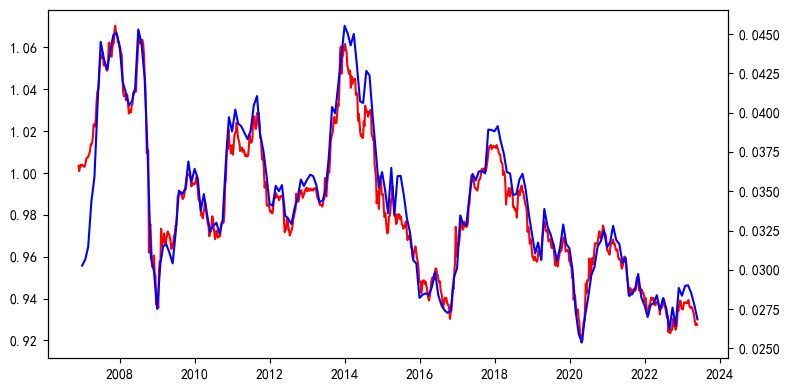

In [149]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax1 = plt.subplots(figsize=(8,4)) 
# 绘制第一组数据
ax1.plot(Inter_W.index, Inter_W['Interest'], 'r-', label='HF_Inter')
# 创建第二个Y轴并绘制第二组数据
ax2 = ax1.twinx()
ax2.plot(Macro_raw_factor.index, Macro_raw_factor['Interest'], 'b-', label='RAW_Inter')

plt.tight_layout()
plt.show()

In [168]:
Credit_W = Asset_price[['CBA04031_CS','CBA02531_CS']]
Credit_W.dropna()

,CBA04031_CS,CBA02531_CS
index,,
2007-10-21,99.9373,117.6219
2007-10-28,100.0190,117.4145
2007-11-04,100.1817,117.4815
2007-11-11,100.0415,116.6758
2007-11-18,99.9913,115.7683
...,...,...
2023-04-30,267.4851,221.8775
2023-05-07,268.0081,222.3844
2023-05-14,268.6643,222.9489


In [194]:
#Credit
# Credit_W = w.wsd("CBA04031.CS,CBA02531.CS", "close", "2006-12-22", "2023-06-30", "Period=W",usedf=True)[1].dropna()
Credit_W = Asset_price[['CBA04031_CS','CBA02531_CS']].dropna()
# 去趋势
from scipy.signal  import detrend 

Credit_W.dropna(inplace=True)
for column in Credit_W.columns: 
#     # 将结果添加到DataFrame 
    Credit_W[f'{column}'] = detrend(Credit_W[column])+Credit_W[column].mean()/3






Credit_W = -Credit_W.pct_change()
# plt.plot(Credit_W)
Credit_W['Credit_HF_'] = (Credit_W['CBA04031_CS'] - Credit_W['CBA02531_CS'])
# Credit_W.dropna(inplace=True)
# Credit_W['Credit_HF_'] = detrend(Credit_W['Credit_HF_'],type='linear')


Credit_W['Credit_HF'] = (1+Credit_W['Credit_HF_']).cumprod()


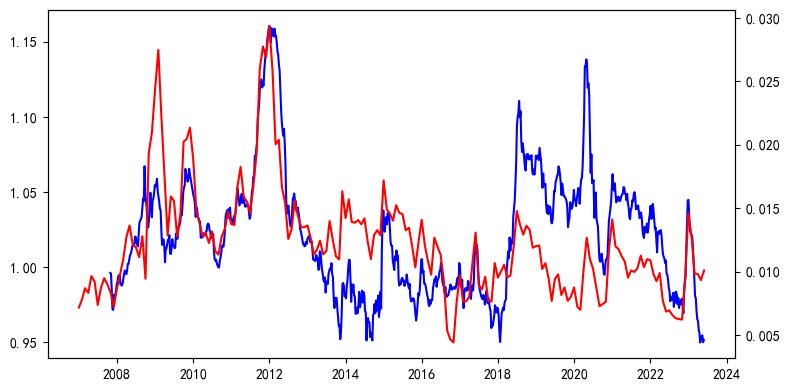

In [195]:
fig, ax1 = plt.subplots(figsize=(8,4)) 
# 绘制第一组数据
ax1.plot(Credit_W.index, Credit_W['Credit_HF'], 'b-', label='HF_Credit')
# ax1.set_yticks(np.arange(0.98,1.05,0.02))
# 创建第二个Y轴并绘制第二组数据
ax2 = ax1.twinx()
ax2.plot(Macro_raw_factor.index, Macro_raw_factor['Credit'], 'r-', label='RAW_Inter')

plt.tight_layout()
plt.show()

## 增长、通胀、流动性

In [196]:
#增长因子HF
# g1 = w.edb("S0031510,S0105912,M0049225", "2006-06-22", "2023-06-30","Fill=Previous",'Period=W',usedf=True)[1]
g1 = Asset_price[['S0031510','S0105912','M0049225']]
g1.index = pd.to_datetime(g1.index)
g1 = g1.resample("W").last()
# g2 = w.wsd("HSI.HI", "close", "2006-06-22", "2023-06-30", "Period=W",usedf=True)[1].dropna()
g2 = Asset_price[['HSI_HI']]
g2.index = pd.to_datetime(g2.index)
g2.columns = ['HSI']
g2 = g2.resample("W").last()

In [197]:
grow_data = pd.concat([g1,g2],axis=1)
grow_data.to_csv("grow_data.csv")

In [198]:
#test
log_price = np.log(grow_data)
#同比
log_yoy = log_price - log_price.shift(52)
log_yoy = log_yoy.dropna()
print(f"对数同比序列：{log_yoy.shape}")
print(log_yoy.head())
#因子对齐
log_yoy_monthly = log_yoy.resample('M').last()
common_dates = Macro_raw_factor.index.intersection(log_yoy_monthly.index)
macro_monthly = Macro_raw_factor.loc[common_dates, 'Growth']
X_monthly = log_yoy_monthly.loc[common_dates, :]
print(X_monthly)

对数同比序列：(803, 4)
            S0031510  S0105912  M0049225       HSI
index                                             
2007-06-24  0.210997  0.124636  1.470343  0.330471
2007-07-01  0.210881  0.065596  1.355817  0.291482
2007-07-08  0.216794 -0.021922  1.320631  0.314005
2007-07-15  0.205437 -0.059770  1.335150  0.358767
2007-07-22  0.233510  0.101993  1.440032  0.346919
            S0031510  S0105912  M0049225       HSI
index                                             
2007-06-30  0.210997  0.124636  1.470343  0.330471
2007-07-31  0.218102  0.058281  1.540506  0.286075
2007-08-31  0.194157 -0.015047  1.697020  0.301503
2007-09-30  0.218054 -0.011514  1.507785  0.436442
2007-10-31  0.187385 -0.043626  1.518902  0.507847
...              ...       ...       ...       ...
2023-01-31 -0.097959  0.029589 -0.117799 -0.124427
2023-02-28 -0.143737  0.026135 -0.094959 -0.129086
2023-03-31 -0.195423 -0.011865 -0.148897 -0.072112
2023-04-30 -0.195115 -0.045788 -0.192657 -0.058323
2023-05-31 -0.1

In [199]:
grow_data.corr()

,S0031510,S0105912,M0049225,HSI
S0031510,1.000000,0.873655,-0.058475,0.270564
S0105912,0.873655,1.000000,-0.101903,0.251780
M0049225,-0.058475,-0.101903,1.000000,0.620893
HSI,0.270564,0.251780,0.620893,1.000000


In [200]:
def product_HF_weights(price_data: pd.DataFrame,macro_factor_raw_name: str):
    #周频对数价格
    log_price = np.log(price_data)
    #同比
    log_yoy = log_price - log_price.shift(52)
    log_yoy = log_yoy.dropna()
    print(f"对数同比序列：{log_yoy.shape}")
    print(log_yoy.head())

    #因子对齐
    log_yoy_monthly = log_yoy.resample('M').last()
    common_dates = Macro_raw_factor.index.intersection(log_yoy_monthly.index)
    macro_monthly = Macro_raw_factor.loc[common_dates, macro_factor_raw_name]
    X_monthly = log_yoy_monthly.loc[common_dates, :]

    
    #领先滞后回归
    # 测试领先期范围（-6到6个月）
    asset_names = price_data.columns.tolist()
    lead_lags = range(0, 12) #lag代表Y相对于X领先多少期
    X_combined = pd.DataFrame()
    for asset in asset_names:
        print("-"*100)
        print(f"正在处理资产:{asset}")
        best_score = -np.inf
        best_lead_lag = 0
        best_model = None
        scores = []
        for lead_lag in lead_lags:
            # 调整Y的时间
            if lead_lag >= 0:
                y_shifted = macro_monthly.iloc[lead_lag:]
                X_shifted = X_monthly[asset].iloc[:-lead_lag] if lead_lag > 0 else X_monthly[asset]
            else:
                y_shifted = macro_monthly.iloc[:lead_lag]
                X_shifted = X_monthly[asset].iloc[-lead_lag:]
            
            # 对齐索引
            common_idx = y_shifted.index
            X_shifted.index = common_idx
            if len(common_idx) < 10:  # 至少需要10个样本
                continue
            
            y_aligned = y_shifted.loc[common_idx]
            X_aligned = X_shifted.loc[common_idx]

            # 线性回归
            model = LinearRegression()
            model.fit(pd.DataFrame(X_aligned), y_aligned)
            score = model.score(pd.DataFrame(X_aligned), y_aligned)
            scores.append(score)
            
            print(f"领先期={lead_lag:2d}月, R²={score:.4f}")
            
            if score > best_score:
                best_score = score
                best_lead_lag = lead_lag
                best_model = model
                X_best = X_aligned
        print(f"\n最优领先期: {best_lead_lag}月, R²={best_score:.4f}")
        print(f"回归系数: {dict(zip(asset_names, best_model.coef_))}")
        X_combined = pd.concat([X_combined,X_best],axis=1)
    
    X_combined = X_combined.dropna()
    common_idx = X_combined.index
    y_combined = macro_monthly.loc[common_idx]
    #多元资产回归
    print("-"*60)
    print("开始多元资产回归")
    model_2 = LinearRegression()
    model_2.fit(X_combined,y_combined)
    score_2 = model_2.score(X_combined,y_combined)
    print(f"多元资产回归R²: {score_2:.4f}")
    print(f"回归系数: {dict(zip(asset_names, model_2.coef_))}")

    # 取绝对值后归一化（使权重和为1）
    weights_raw = np.abs(model_2.coef_)
    weights = weights_raw / weights_raw.sum()
    print("归一化权重:")
    for name, weight in zip(asset_names, weights):
        print(f"  {name}: {weight:.4f}")

    return weights,X_combined

In [201]:
weights,X = product_HF_weights(grow_data.loc['2007-10-15':],'Growth')

对数同比序列：(737, 4)
            S0031510  S0105912  M0049225       HSI
index                                             
2008-10-19 -0.263378 -0.466234 -1.132275 -0.705325
2008-10-26 -0.338004 -0.568260 -1.196506 -0.879460
2008-11-02 -0.356049 -0.614821 -1.364890 -0.779871
2008-11-09 -0.365496 -0.643488 -1.310748 -0.703503
2008-11-16 -0.376466 -0.569819 -1.094789 -0.712494
----------------------------------------------------------------------------------------------------
正在处理资产:S0031510
领先期= 0月, R²=0.3211
领先期= 1月, R²=0.2629
领先期= 2月, R²=0.1910
领先期= 3月, R²=0.1206
领先期= 4月, R²=0.0629
领先期= 5月, R²=0.0241
领先期= 6月, R²=0.0040
领先期= 7月, R²=0.0006
领先期= 8月, R²=0.0119
领先期= 9月, R²=0.0330
领先期=10月, R²=0.0565
领先期=11月, R²=0.0745

最优领先期: 0月, R²=0.3211
回归系数: {'S0031510': np.float64(0.14112782913271235)}
----------------------------------------------------------------------------------------------------
正在处理资产:S0105912
领先期= 0月, R²=0.3563
领先期= 1月, R²=0.3050
领先期= 2月, R²=0.2238
领先期= 3月, R²=0.1423
领先期= 4月, R²=0.0

In [202]:
# 
# 批量领先滞后-周
def product_HF_weights_batW(price_data: pd.DataFrame, macro_factor_raw_name: str):
    # 周频对数价格
    log_price = np.log(price_data)
    # 同比
    log_yoy = log_price - log_price.shift(52)
    log_yoy = log_yoy.dropna()
    print(f"对数同比收益率序列：{log_yoy.shape}")

    asset_names = price_data.columns.tolist()
    lead_lags = range(0, 7)  # 代表X（自变量）领先Y多少期（按周，对X做shift）
    best_score = -np.inf
    best_lead_lag = 0
    best_model = None
    scores = []
    X_best = None
    idx_best = None

    for lead_lag in lead_lags:
        # 对X在周频上做shift，使其成为领先指标
        if lead_lag > 0:
            X_shifted = log_yoy.shift(lead_lag)
        else:
            X_shifted = log_yoy.copy()
        # 按月降采样（降至月末，与你的因子对齐）
        X_monthly = X_shifted.resample('M').last()
        
        # 按日期对齐
        common_dates = Macro_raw_factor.index.intersection(X_monthly.dropna().index)
        macro_monthly = Macro_raw_factor.loc[common_dates, macro_factor_raw_name]
        X_monthly_aligned = X_monthly.loc[common_dates, :]
        if len(common_dates) < 10:
            continue
        
        # 线性回归
        model = LinearRegression()
        model.fit(X_monthly_aligned, macro_monthly)
        score = model.score(X_monthly_aligned, macro_monthly)
        scores.append(score)

        print(f"领先期={lead_lag:2d}周, R²={score:.4f}")

        if score > best_score:
            best_score = score
            best_lead_lag = lead_lag
            best_model = model
            X_best = X_monthly_aligned
            X_best_week = X_shifted
            idx_best = common_dates

    print(f"\n最优领先期: {best_lead_lag}周, R²={best_score:.4f}")
    print(f"回归系数: {dict(zip(asset_names, best_model.coef_))}")

    # 取绝对值后归一化（使权重和为1）
    weights_raw = np.abs(best_model.coef_)
    weights = weights_raw / weights_raw.sum()
    print("归一化权重:")
    for name, weight in zip(asset_names, weights):
        print(f"  {name}: {weight:.4f}")
    return weights, X_best,X_best_week,best_lead_lag

In [203]:
# 批量领先滞后-月
def product_HF_weights_bat(price_data: pd.DataFrame,macro_factor_raw_name: str):
    #周频对数价格
    log_price = np.log(price_data)
    #同比
    log_yoy = log_price - log_price.shift(52)
    log_yoy = log_yoy.dropna()
    print(f"对数同比收益率序列：{log_yoy.shape}")

    #因子对齐
    log_yoy_monthly = log_yoy.resample('M').last()
    common_dates = Macro_raw_factor.index.intersection(log_yoy_monthly.index)
    macro_monthly = Macro_raw_factor.loc[common_dates, macro_factor_raw_name]
    X_monthly = log_yoy_monthly.loc[common_dates, :]

    
    #领先滞后回归
    # 测试领先期范围（-6到6个月）
    asset_names = price_data.columns.tolist()
    lead_lags = range(0, 7) #lag代表Y相对于X领先多少期
    best_score = -np.inf
    best_lead_lag = 0
    best_model = None
    scores = []

    for lead_lag in lead_lags:
        # 调整Y的时间
        if lead_lag >= 0:
            y_shifted = macro_monthly.iloc[lead_lag:]
            X_shifted = X_monthly.iloc[:-lead_lag] if lead_lag > 0 else X_monthly
        else:
            y_shifted = macro_monthly.iloc[:lead_lag]
            X_shifted = X_monthly.iloc[-lead_lag:]
        
        # 对齐索引
        common_idx = y_shifted.index
        X_shifted.index = common_idx
        if len(common_idx) < 10:  # 至少需要10个样本
            continue
        
        y_aligned = y_shifted.loc[common_idx]
        X_aligned = X_shifted.loc[common_idx]
        # 线性回归
        model = LinearRegression()
        model.fit(X_aligned, y_aligned)
        score = model.score(X_aligned, y_aligned)
        scores.append(score)
        
        print(f"领先期={lead_lag:2d}月, R²={score:.4f}")
        
        if score > best_score:
            best_score = score
            best_lead_lag = lead_lag
            best_model = model

    print(f"\n最优领先期: {best_lead_lag}月, R²={best_score:.4f}")
    print(f"回归系数: {dict(zip(asset_names, best_model.coef_))}")
    # 取绝对值后归一化（使权重和为1）
    weights_raw = np.abs(best_model.coef_)
    weights = weights_raw / weights_raw.sum()
    print("归一化权重:")
    for name, weight in zip(asset_names, weights):
        print(f"  {name}: {weight:.4f}")
    return weights,X_aligned,best_lead_lag

In [204]:
weights,X_m,lag = product_HF_weights_bat(grow_data,'Growth')

对数同比收益率序列：(803, 4)
领先期= 0月, R²=0.3956
领先期= 1月, R²=0.3573
领先期= 2月, R²=0.2923
领先期= 3月, R²=0.2237
领先期= 4月, R²=0.1677
领先期= 5月, R²=0.1268
领先期= 6月, R²=0.0932

最优领先期: 0月, R²=0.3956
回归系数: {'S0031510': np.float64(0.0807695277038098), 'S0105912': np.float64(0.007362904332715132), 'M0049225': np.float64(-0.003123943869152074), 'HSI': np.float64(0.06806201041172556)}
归一化权重:
  S0031510: 0.5070
  S0105912: 0.0462
  M0049225: 0.0196
  HSI: 0.4272


In [205]:
weights,X_m,X_w,lag = product_HF_weights_batW(grow_data,'Growth')

对数同比收益率序列：(803, 4)
领先期= 0周, R²=0.3956
领先期= 1周, R²=0.3877
领先期= 2周, R²=0.3786
领先期= 3周, R²=0.3631
领先期= 4周, R²=0.3587
领先期= 5周, R²=0.3505
领先期= 6周, R²=0.3355

最优领先期: 0周, R²=0.3956
回归系数: {'S0031510': np.float64(0.0807695277038098), 'S0105912': np.float64(0.007362904332715132), 'M0049225': np.float64(-0.003123943869152074), 'HSI': np.float64(0.06806201041172556)}
归一化权重:
  S0031510: 0.5070
  S0105912: 0.0462
  M0049225: 0.0196
  HSI: 0.4272


对数环比序列: (845, 4)
            S0031510  S0105912  M0049225       HSI
index                                             
2006-07-02  0.004121  0.056124  0.034609  0.028609
2006-07-09  0.001768  0.108392  0.021540  0.011743
2006-07-16  0.016851  0.024756  0.046577 -0.019885
2006-07-23 -0.017373 -0.107011  0.023958  0.020152
2006-07-30  0.005783  0.028876 -0.012411  0.029378
高频Growth环比序列: (845,)
index
2006-07-02    0.017584
2006-07-09    0.011345
2006-07-16    0.002105
2006-07-23   -0.004674
2006-07-30    0.016574
dtype: float64
高频Growth因子: (782,)
index
2007-10-28    1.012734
2007-11-04    1.013124
2007-11-11    0.985988
2007-11-18    0.964486
2007-11-25    0.939121
dtype: float64


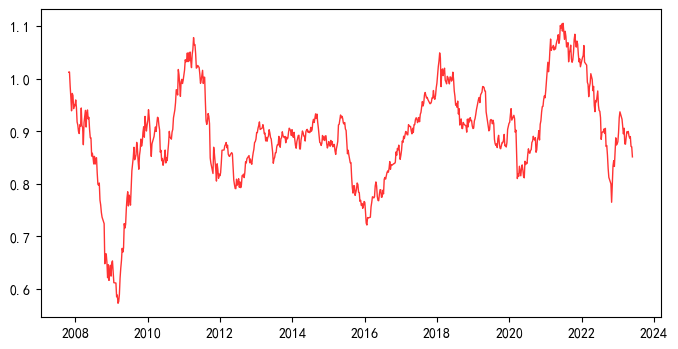

In [206]:
#计算周频资产的环比序列
price_mom = np.log(grow_data).diff()
price_mom = price_mom.shift(lag)
price_mom = price_mom.dropna()
print(f"对数环比序列: {price_mom.shape}")
print(price_mom.head())
# 加权
high_freq_growth_mom = (price_mom * weights).sum(axis=1)
print(f"高频Growth环比序列: {high_freq_growth_mom.shape}")
print(high_freq_growth_mom.head())
#合成环比高频宏观因子
high_freq_growth_mom = high_freq_growth_mom.loc["2007-10-28":]
high_freq_growth = (1+high_freq_growth_mom).cumprod()
print(f"高频Growth因子: {high_freq_growth.shape}")
print(high_freq_growth.head())
#作图
plt.figure(figsize=(8, 4))
plt.plot(high_freq_growth.index, 
            high_freq_growth, 
            label='高频Growth因子（周频）', 
            color='r',
            linewidth=1, 
            alpha=0.8)
growth_mom_ = high_freq_growth_mom
growth_mom_net = high_freq_growth

同比序列: (803, 4)
            S0031510  S0105912  M0049225       HSI
index                                             
2007-06-24  0.210997  0.124636  1.470343  0.330471
2007-07-01  0.210881  0.065596  1.355817  0.291482
2007-07-08  0.216794 -0.021922  1.320631  0.314005
2007-07-15  0.205437 -0.059770  1.335150  0.358767
2007-07-22  0.233510  0.101993  1.440032  0.346919
高频Growth同比序列: (803,)
index
2007-06-24    0.282739
2007-07-01    0.261050
2007-07-08    0.268935
2007-07-15    0.280836
2007-07-22    0.299539
dtype: float64
高频Growth同比因子: (786,)
index
2007-10-28    0.339721
2007-11-04    0.328971
2007-11-11    0.287405
2007-11-18    0.263661
2007-11-25    0.227239
dtype: float64


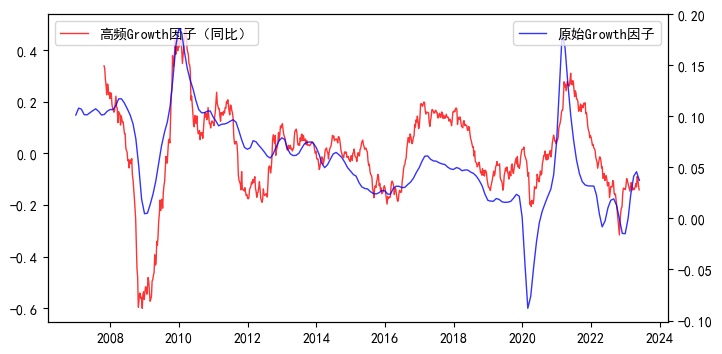

In [207]:
#同比序列

# price_yoy = grow_data.pct_change(52)
price_yoy = np.log(grow_data).diff(52)
price_yoy = price_yoy.shift(lag)
# price_yoy = np.log(grow_data).diff(52)
price_yoy = price_yoy.dropna()
print(f"同比序列: {price_yoy.shape}")
print(price_yoy.head())
# 加权
high_freq_growth_yoy = (price_yoy * weights).sum(axis=1)
print(f"高频Growth同比序列: {high_freq_growth_yoy.shape}")
print(high_freq_growth_yoy.head())
#合成同比高频宏观因子
high_freq_growth_yoy = high_freq_growth_yoy.loc["2007-10-28":]
# high_freq_growth_yoy = (1+high_freq_growth_yoy).cumprod()
print(f"高频Growth同比因子: {high_freq_growth_yoy.shape}")
print(high_freq_growth_yoy.head())

#作图
#左右坐标轴

fig, ax1 = plt.subplots(figsize=(8, 4))   
ax2 = ax1.twinx()

ax1.plot(high_freq_growth_yoy.index, 
            high_freq_growth_yoy, 
            label='高频Growth因子（同比）', 
            linewidth=1, 
            color='r',
            alpha=0.8)
# ax1.set_yticks([-0.5, 0.8, 0.1])
ax2.plot(Macro_raw_factor['Growth'],label='原始Growth因子',linewidth=1,alpha=0.8,color='b')
ax2.set_yticks(np.arange(-0.1, 0.25, 0.05))
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

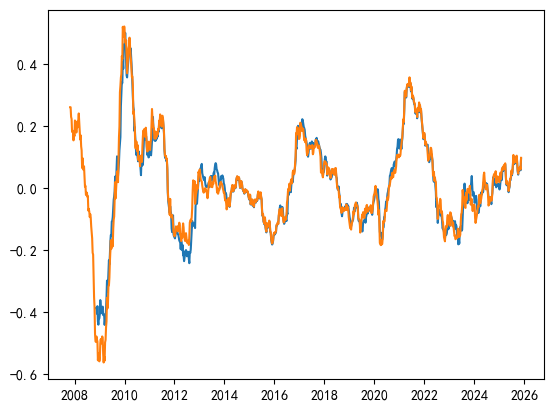

In [288]:
plt.plot(np.log(high_freq_growth).diff(52))
plt.plot(high_freq_growth_yoy)

In [208]:
#通胀因子HF
# inflation_data = w.edb("S0031525,S0143884,S0179664", "2006-06-22", "2023-06-30","Fill=Previous",'Period=W',usedf=True)[1]
inflation_data = Asset_price[['S0031525','S0143884','S0179664']]
inflation_data.index = pd.to_datetime(inflation_data.index)
inflation_data = inflation_data.resample("W").last()

In [209]:
weights,X,X_m,lag = product_HF_weights_batW(inflation_data,'Inflation')

对数同比收益率序列：(722, 3)
领先期= 0周, R²=0.6552
领先期= 1周, R²=0.6733
领先期= 2周, R²=0.7218
领先期= 3周, R²=0.7288
领先期= 4周, R²=0.7410
领先期= 5周, R²=0.7096
领先期= 6周, R²=0.7320

最优领先期: 4周, R²=0.7410
回归系数: {'S0031525': np.float64(0.03048627048802405), 'S0143884': np.float64(0.021262542140206224), 'S0179664': np.float64(0.03996748967670193)}
归一化权重:
  S0031525: 0.3324
  S0143884: 0.2318
  S0179664: 0.4358


对数环比序列: (769, 3)
            S0031525  S0143884  S0179664
index                                   
2008-09-07 -0.091428  0.000000  0.000000
2008-09-14 -0.006906 -0.007749 -0.041869
2008-09-21  0.012099  0.000000  0.000000
2008-09-28  0.001141 -0.003269  0.000000
2008-10-05 -0.091381  0.000000 -0.018467
高频Growth环比序列: (769,)
index
2008-09-07   -0.030391
2008-09-14   -0.022338
2008-09-21    0.004022
2008-09-28   -0.000379
2008-10-05   -0.038422
Freq: W-SUN, dtype: float64
高频Growth因子: (769,)
index
2008-09-07    0.969609
2008-09-14    0.947951
2008-09-21    0.951763
2008-09-28    0.951403
2008-10-05    0.914848
Freq: W-SUN, dtype: float64


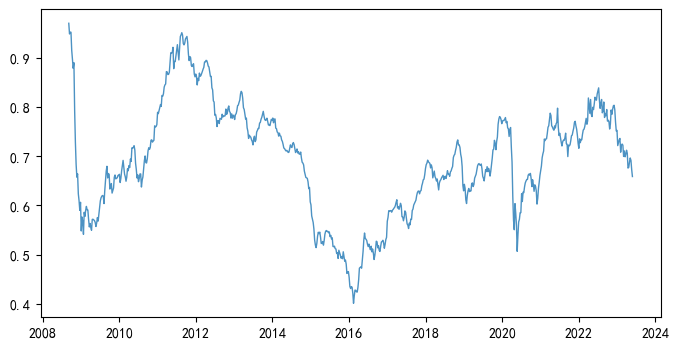

In [210]:
#计算周频资产的环比序列
price_mom = np.log(inflation_data).diff()
price_mom = price_mom.shift(lag)
price_mom = price_mom.dropna()
print(f"对数环比序列: {price_mom.shape}")
print(price_mom.head())
# 加权
high_freq_mom = (price_mom * weights).sum(axis=1)
print(f"高频Growth环比序列: {high_freq_mom.shape}")
print(high_freq_mom.head())
#合成环比高频宏观因子
high_freq_mom = high_freq_mom.loc["2007-10-28":]
high_freq = (1+high_freq_mom).cumprod()
print(f"高频Growth因子: {high_freq.shape}")
print(high_freq.head())
#作图
plt.figure(figsize=(8, 4))
plt.plot(high_freq.index, 
            high_freq, 
            label='高频Growth因子（周频）', 
            linewidth=1, 
            alpha=0.8)

infl_mom = high_freq_mom
infl_net = high_freq

同比序列: (718, 3)
            S0031525  S0143884  S0179664
index                                   
2009-08-30 -0.422612 -0.284001  -0.21703
2009-09-06 -0.350657 -0.265154  -0.21703
2009-09-13 -0.356641 -0.235000  -0.25000
2009-09-20 -0.348754 -0.216152  -0.25000
2009-09-27 -0.361771 -0.201001  -0.25000
高频Growth同比序列: (718,)
index
2009-08-30   -0.300891
2009-09-06   -0.272604
2009-09-13   -0.281970
2009-09-20   -0.274979
2009-09-27   -0.275793
Freq: W-SUN, dtype: float64
高频Growth同比因子: (718,)
index
2009-08-30   -0.300891
2009-09-06   -0.272604
2009-09-13   -0.281970
2009-09-20   -0.274979
2009-09-27   -0.275793
Freq: W-SUN, dtype: float64


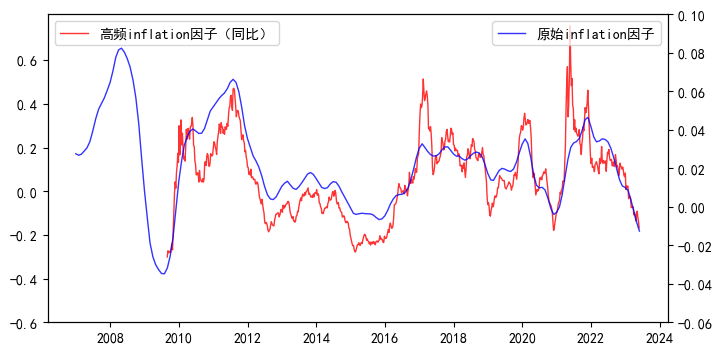

In [212]:
#同比序列

price_yoy = inflation_data.pct_change(52)
price_yoy= price_yoy.shift(lag)
price_yoy = price_yoy.dropna()
print(f"同比序列: {price_yoy.shape}")
print(price_yoy.head())
# 加权
high_freq_yoy = (price_yoy * weights).sum(axis=1)
print(f"高频Growth同比序列: {high_freq_yoy.shape}")
print(high_freq_yoy.head())
#合成同比高频宏观因子
high_freq_yoy_1 = high_freq_yoy.loc["2007-10-28":]
print(f"高频Growth同比因子: {high_freq_yoy_1.shape}")
print(high_freq_yoy_1.head())

#作图
#左右坐标轴
fig, ax1 = plt.subplots(figsize=(8, 4))   
ax2 = ax1.twinx()

ax1.plot(high_freq_yoy_1.index, 
            high_freq_yoy_1, 
            label='高频inflation因子（同比）', 
            linewidth=1, 
            color='r',
            alpha=0.8)
ax1.set_yticks(np.arange(-0.6, 0.7, 0.2))
ax2.plot(Macro_raw_factor['Inflation'],label='原始inflation因子',linewidth=1,alpha=0.8,color='b')
ax2.set_yticks(np.arange(-0.06, 0.11, 0.02))
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

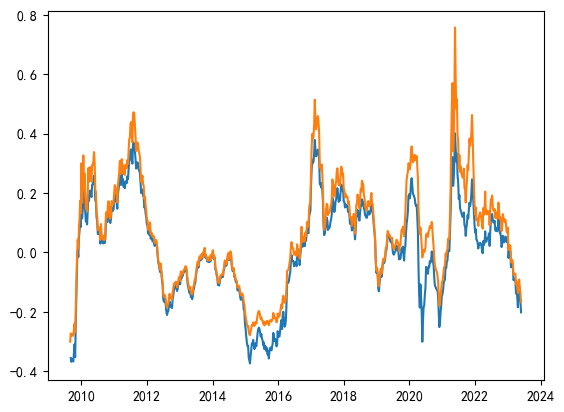

In [213]:
plt.plot(np.log(infl_net).diff(52))
plt.plot(high_freq_yoy_1)

In [320]:
#流动性因子HF
# 流动性因子：申万大盘市盈率(M0049385)，申万小盘市盈率(M0049387)
# liquidity_data = w.edb("M0049385,M0049387", "2006-06-22", "2023-06-30","Fill=Previous",'Period=W',usedf=True)[1]
liquidity_data = Asset_price[['M0049385','M0049387']]
liquidity_data.index = pd.to_datetime(liquidity_data.index)
liquidity_data = liquidity_data.resample("W").last().dropna()

In [322]:
weights,X_m,lag = product_HF_weights_bat(liquidity_data,'Liquidity')

对数同比收益率序列：(832, 2)
领先期= 0月, R²=0.0490
领先期= 1月, R²=0.0251
领先期= 2月, R²=0.0112
领先期= 3月, R²=0.0073
领先期= 4月, R²=0.0102
领先期= 5月, R²=0.0177
领先期= 6月, R²=0.0250

最优领先期: 0月, R²=0.0490
回归系数: {'M0049385': np.float64(-0.009240774687851956), 'M0049387': np.float64(0.02304929957344443)}
归一化权重:
  M0049385: 0.2862
  M0049387: 0.7138


对数环比序列: (883, 2)
            M0049385  M0049387
index                         
2006-07-02  0.039459  0.037894
2006-07-09  0.029328  0.118716
2006-07-16 -0.039799 -0.033387
2006-07-23  0.001002  0.004619
2006-07-30 -0.009054 -0.003270
高频Liquidity环比序列: (883,)
index
2006-07-02    0.038342
2006-07-09    0.093135
2006-07-16   -0.035222
2006-07-23    0.003584
2006-07-30   -0.004925
Freq: W-SUN, dtype: float64
高频Liquidity因子: (815,)
index
2007-10-21    0.992285
2007-10-28    0.908080
2007-11-04    0.922274
2007-11-11    0.876937
2007-11-18    0.880368
Freq: W-SUN, dtype: float64


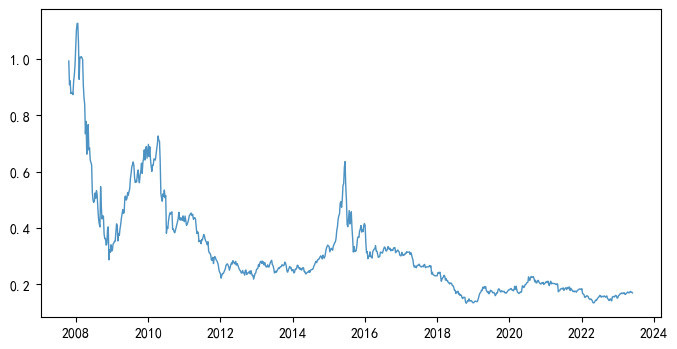

In [324]:
#计算周频资产的环比序列
# price_mom = liquidity_data.pct_change()
price_mom = np.log(liquidity_data).diff()
price_mom = price_mom.shift(lag)
price_mom = price_mom.dropna()
print(f"对数环比序列: {price_mom.shape}")
print(price_mom.head())
# 加权
high_freq_mom = (price_mom * weights).sum(axis=1)
print(f"高频Liquidity环比序列: {high_freq_mom.shape}")
print(high_freq_mom.head())
#合成环比高频宏观因子
high_freq_mom = high_freq_mom.loc["2007-10-21":]
high_freq = (1+high_freq_mom).cumprod()
print(f"高频Liquidity因子: {high_freq.shape}")
print(high_freq.head())
#作图
plt.figure(figsize=(8, 4))
plt.plot(high_freq.index, 
            high_freq, 
            label='高频Liquidity因子（周频）', 
            linewidth=1, 
            alpha=0.8)
liqui_mom_ = high_freq_mom
liqui_net = high_freq

同比序列: (832, 2)
            M0049385  M0049387
index                         
2007-06-24  1.464396  0.929959
2007-07-01  1.210317  0.643908
2007-07-08  1.204239  0.313806
2007-07-15  1.367419  0.390239
2007-07-22  1.461693  0.437212
高频Growth同比序列: (832,)
index
2007-06-24    1.068042
2007-07-01    0.790252
2007-07-08    0.543869
2007-07-15    0.642715
2007-07-22    0.701909
Freq: W-SUN, dtype: float64
高频Growth同比因子: (815,)
index
2007-10-21    0.589761
2007-10-28    0.511783
2007-11-04    0.525214
2007-11-11    0.485820
2007-11-18    0.490590
Freq: W-SUN, dtype: float64


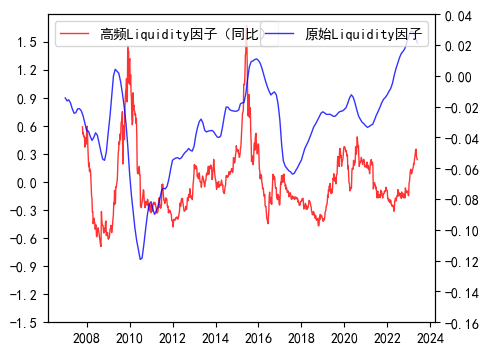

In [233]:
#同比序列

price_yoy = liquidity_data.pct_change(52)
price_yoy = price_yoy.dropna()
print(f"同比序列: {price_yoy.shape}")
print(price_yoy.head())
# 加权
high_freq_yoy_2 = (price_yoy * weights).sum(axis=1)
print(f"高频Growth同比序列: {high_freq_yoy_2.shape}")
print(high_freq_yoy_2.head())
#合成同比高频宏观因子
high_freq_yoy_2 = high_freq_yoy_2.loc["2007-10-21":]
print(f"高频Growth同比因子: {high_freq_yoy_2.shape}")
print(high_freq_yoy_2.head())

#作图
#左右坐标轴
fig, ax1 = plt.subplots(figsize=(5, 4))   
ax2 = ax1.twinx()

ax1.plot(high_freq_yoy_2.index, 
            high_freq_yoy_2, 
            label='高频Liquidity因子（同比）', 
            color='r',
            linewidth=1, 
            alpha=0.8)
ax1.set_yticks(np.arange(-1.5, 1.8, 0.3))
ax2.plot(Macro_raw_factor['Liquidity'],label='原始Liquidity因子',linewidth=1,alpha=0.8,color='b')
ax2.set_yticks(np.arange(-0.16, 0.06, 0.02))
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## 数据存储

In [252]:
#同比组合
Credit_W.index = pd.to_datetime(Credit_W.index)
Credit_W = Credit_W.resample("W").last()
Inter_W_.index = pd.to_datetime(Inter_W_.index)
Inter_W_ = Inter_W_.resample("W").last()
high_freq_growth_yoy.index = pd.to_datetime(high_freq_growth_yoy.index)
high_freq_yoy_1.index = pd.to_datetime(high_freq_yoy_1.index)
high_freq_yoy_2.index = pd.to_datetime(high_freq_yoy_2.index)


In [253]:
Exchange_W = w.edb("M0000271",
                    "2006-06-01", 
                    "2023-06-01",
                    "Fill=Previous",
                    "Period=W",
                    usedf=True)[1]
Exchange_W = Exchange_W.pct_change().dropna()
Exchange_W.columns = ['Exchange_HF']
Exchange_W.index = pd.to_datetime(Exchange_W.index)
Exchange_W = Exchange_W.resample("W").last()
Exchange_W_net = (1+Exchange_W).cumprod()

In [254]:
Macro_HF_yoy = pd.concat([Credit_W['Credit_HF_'],Inter_W_['Interest'],Exchange_W['Exchange_HF'],high_freq_growth_yoy,high_freq_yoy_1,high_freq_yoy_2],axis=1) 
Macro_HF_yoy.columns = ['Credit_HF','Interest_HF','Exchange_HF','Growth_HF','Inflation_HF','Liquidity_HF']
Macro_HF_yoy.fillna(method='ffill',inplace=True)
Macro_HF_yoy = Macro_HF_yoy.iloc[:-1]
Macro_HF_yoy.dropna()

,Credit_HF,Interest_HF,Exchange_HF,Growth_HF,Inflation_HF,Liquidity_HF
2009-08-30,0.002435,-0.000892,0.002946,-0.037197,-0.300891,0.751896
2009-09-06,0.006014,-0.001227,-0.001532,0.010317,-0.272604,0.192130
2009-09-13,-0.001936,0.000641,-0.018672,0.049589,-0.281970,0.425832
2009-09-20,0.006742,0.000959,-0.003779,0.055202,-0.274979,0.603043
2009-09-27,0.008113,0.003216,0.003140,0.040787,-0.275793,0.494553
...,...,...,...,...,...,...
2023-04-30,0.002691,-0.002508,-0.000547,-0.129727,-0.104746,0.344849
2023-05-07,0.001627,-0.002369,-0.003680,-0.089302,-0.091322,0.351639
2023-05-14,0.000626,-0.001626,0.013956,-0.098360,-0.117748,0.273934
2023-05-21,-0.004810,0.000903,0.004752,-0.121847,-0.137787,0.249828


In [270]:
#环比组合
# growth_mom_ = high_freq_growth_mom
# growth_mom_net = high_freq_growth
# infl_mom = high_freq_mom
# infl_net = high_freq
# liqui_mom_ = high_freq_mom
# liqui_net = high_freq

growth_mom_.index = pd.to_datetime(growth_mom_.index)
infl_mom.index = pd.to_datetime(infl_mom.index)
liqui_mom_.index = pd.to_datetime(liqui_mom_.index)

growth_mom_net.index = pd.to_datetime(growth_mom_net.index)
infl_net.index = pd.to_datetime(infl_net.index)
liqui_net.index = pd.to_datetime(liqui_net.index)

#环比yoy
Macro_HF_mom_1 = pd.concat([Credit_W['Credit_HF_'],Inter_W_['Interest'],Exchange_W['Exchange_HF'],growth_mom_,infl_mom,liqui_mom_],axis=1) 
Macro_HF_mom_1.columns = ['Credit_HF','Interest_HF','Exchange_HF','Growth_HF','Inflation_HF','Liquidity_HF']
Macro_HF_mom_1.fillna(method='ffill',inplace=True)
Macro_HF_mom_1 = Macro_HF_mom_1.iloc[:-1]

#净值yoy
Macro_HF_mom_2 = pd.concat([Credit_W['Credit_HF'],Inter_W['Interest'],Exchange_W_net['Exchange_HF'],growth_mom_net,infl_net,liqui_net],axis=1) 
Macro_HF_mom_2.columns = ['Credit_HF','Interest_HF','Exchange_HF','Growth_HF','Inflation_HF','Liquidity_HF']
Macro_HF_mom_2.fillna(method='ffill',inplace=True)
Macro_HF_mom_2 = Macro_HF_mom_2.iloc[:-1]
# Macro_HF_mom_2.dropna()

In [271]:
#initial_factor
with easy_manager.EasyManager(database='macro_data_base') as em:
    #初始宏观因子(月频)
    # em.create_table('macro_intial_data_monthly',macro_data_M,overwrite=True)
    #原始宏观组合因子(月频)
    # em.create_table('macro_raw_con_data_monthly',Macro_raw_factor,overwrite=True)
    #高频宏观因子(同比周频)
    em.create_table('macro_high_freq_data_weekly_yoy',Macro_HF_yoy,overwrite=True)
    #高频宏观因子（环比周频）
    em.create_table('macro_high_freq_data_weekly_mom_1',Macro_HF_mom_1,overwrite=True)
    #高频宏观因子（环比净值周频）
    em.create_table('macro_high_freq_data_weekly_mom_2_net',Macro_HF_mom_2,overwrite=True)
    


2025-11-24 16:26:29,678 - datadeal_20251124 - INFO - 数据库连接成功: macro_data_base
2025-11-24 16:26:29,678 - datadeal_20251124 - INFO - [Function: create_table started...]
2025-11-24 16:26:29,686 - datadeal_20251124 - INFO - 已删除现有表 macro_high_freq_data_weekly_yoy
2025-11-24 16:26:29,729 - datadeal_20251124 - INFO - 表 macro_high_freq_data_weekly_yoy 创建成功，包含 7 列
2025-11-24 16:26:29,783 - datadeal_20251124 - INFO - 成功插入 886 行数据到表 macro_high_freq_data_weekly_yoy
2025-11-24 16:26:29,784 - datadeal_20251124 - INFO - [Function: create_table completed, elapsed time: 0.11s]
2025-11-24 16:26:29,785 - datadeal_20251124 - INFO - [Function: create_table started...]
2025-11-24 16:26:29,789 - datadeal_20251124 - INFO - 已删除现有表 macro_high_freq_data_weekly_mom_1
2025-11-24 16:26:29,796 - datadeal_20251124 - INFO - 表 macro_high_freq_data_weekly_mom_1 创建成功，包含 7 列
2025-11-24 16:26:29,847 - datadeal_20251124 - INFO - 成功插入 886 行数据到表 macro_high_freq_data_weekly_mom_1
2025-11-24 16:26:29,848 - datadeal_20251124 - I

# 因子暴露计算

In [286]:
with easy_manager.EasyManager(database='macro_data_base') as em:
    HF_macro_factor = em.load_table("macro_high_freq_data_weekly_mom_1")
    HF_macro_factor.set_index("index",inplace=True)
    HF_macro_factor.index = pd.to_datetime(HF_macro_factor.index)
    # HF_macro_factor = HF_macro_factor[['Growth_HF','Inflation_HF','Interest_HF','Credit_HF','Exchange_HF','Liquidity_HF']]
    # HF_macro_factor = HF_macro_factor.pct_change().dropna()
    print(HF_macro_factor.tail(10))

2025-11-24 16:33:23,312 - datadeal_20251124 - INFO - 数据库连接成功: macro_data_base
2025-11-24 16:33:23,313 - datadeal_20251124 - INFO - [Function: load_table started...]
2025-11-24 16:33:23,328 - datadeal_20251124 - INFO - 按列 'index' 升序排序
2025-11-24 16:33:23,334 - datadeal_20251124 - INFO - 成功从表 macro_high_freq_data_weekly_mom_1 加载数据，形状: (886, 7)
2025-11-24 16:33:23,335 - datadeal_20251124 - INFO - [Function: load_table completed, elapsed time: 0.02s]
2025-11-24 16:33:23,337 - datadeal_20251124 - INFO - 数据库连接已关闭


            Credit_HF  Interest_HF  Exchange_HF  Growth_HF  Inflation_HF  \
index                                                                      
2023-03-26  -0.005581     0.000348    -0.007295   0.014870      0.007610   
2023-04-02  -0.001408    -0.000424    -0.004937   0.012104      0.011427   
2023-04-09  -0.005877     0.000154    -0.004793  -0.002107     -0.008537   
2023-04-16  -0.002471    -0.001869    -0.005169   0.002773     -0.042648   
2023-04-23  -0.006501    -0.000736     0.001404  -0.009174      0.002230   
2023-04-30   0.002691    -0.002508    -0.000547  -0.004938      0.015597   
2023-05-07   0.001627    -0.002369    -0.003680   0.003245      0.012179   
2023-05-14   0.000626    -0.001626     0.013956  -0.021144     -0.007046   
2023-05-21  -0.004810     0.000903     0.004752  -0.000681     -0.026664   
2023-05-28   0.001596    -0.000644     0.009897  -0.022127     -0.021198   

            Liquidity_HF  
index                     
2023-03-26     -0.002961  
2023-0

In [287]:
def calculate_factor_stats(df):
    """
    计算因子相关系数矩阵和方差膨胀系数(VIF)
    
    参数:
    df : DataFrame, 索引为时间, 列为因子值 
    
    返回:
    corr_matrix : 因子相关系数矩阵 
    vif_series : 每个因子的VIF值序列 
    """
    # ===== 1. 预处理 =====
    df_clean = df.dropna()   # 删除缺失值
    if len(df_clean) < 2:
        raise ValueError("样本量不足，至少需要2个非缺失观测值")
    
    # ===== 2. 计算相关系数矩阵 =====
    corr_matrix = df_clean.corr() 
    
    # ===== 3. 计算VIF =====
    vif_data = []
    factors = df_clean.columns.tolist() 
    
    for i, factor in enumerate(factors):
        # 提取其他因子作为自变量 (排除当前因子)
        X = df_clean.drop(columns=factor) 
        y = df_clean[factor]
        
        # 添加常数项并拟合OLS模型
        X_sm = sm.add_constant(X) 
        model = sm.OLS(y, X_sm).fit()
        
        # 计算VIF (避免R²=1导致除零错误)
        r_squared = model.rsquared  
        vif = 1 / (1 - r_squared) if r_squared < 1 else np.inf 
        vif_data.append(vif) 
    
    vif_series = pd.Series(vif_data, index=factors, name='VIF')
    
    return corr_matrix, vif_series 
 
# 执行计算
correlation_matrix, vif_results = calculate_factor_stats(HF_macro_factor)
 
# ===== 结果展示 ===== 
print("="*50)
print("因子相关系数矩阵:")
print(correlation_matrix.round(2)) 
 
print("\n" + "="*50)
print("方差膨胀系数(VIF):")
print(vif_results.round(2)) 

因子相关系数矩阵:
              Credit_HF  Interest_HF  Exchange_HF  Growth_HF  Inflation_HF  \
Credit_HF          1.00        -0.35        -0.08      -0.06         -0.11   
Interest_HF       -0.35         1.00         0.02       0.12          0.10   
Exchange_HF       -0.08         0.02         1.00      -0.35          0.03   
Growth_HF         -0.06         0.12        -0.35       1.00          0.02   
Inflation_HF      -0.11         0.10         0.03       0.02          1.00   
Liquidity_HF      -0.06         0.05        -0.04       0.06          0.01   

              Liquidity_HF  
Credit_HF            -0.06  
Interest_HF           0.05  
Exchange_HF          -0.04  
Growth_HF             0.06  
Inflation_HF          0.01  
Liquidity_HF          1.00  

方差膨胀系数(VIF):
Credit_HF       1.16
Interest_HF     1.16
Exchange_HF     1.15
Growth_HF       1.16
Inflation_HF    1.02
Liquidity_HF    1.01
Name: VIF, dtype: float64


In [295]:
w.edb("M0000185",'2006-10-13','2025-11-16','Fill=Previous','Period=W',usedf=True)[1]

,CLOSE
2006-10-13,7.9116
2006-10-20,7.8995
2006-10-27,7.8871
2006-11-03,7.8729
2006-11-10,7.8667
...,...
2025-10-24,7.0928
2025-10-31,7.0880
2025-11-07,7.0836
2025-11-14,7.0825


In [ ]:
#资产价格
# price_df = w.wsd("000016.SH,000300.SH,000905.SH,000852.SH,HSI.HI,CBA00601.CS,CBA02001.CS,000832.CSI,NH0200.NHF,NH0300.NHF,B.IPE,AU9999.SGE,SPX.GI", 
#             "close", 
#             "2006-10-13", 
#             "2025-11-16", 
#             usedf=True)[1]
# usdrmb = w.edb("M0000185",'2006-10-13','2025-11-16','Fill=Previous','Period=W',usedf=True)[1]
# # price_df = em.load_table('hf_asset_data_w')
# # price_df.set_index("index",inplace=True)
# price_df.index = pd.to_datetime(price_df.index)

# price_W_df = price_df.resample('W').last()
# print(len(price_W_df))
# usdrmb.index = pd.to_datetime(usdrmb.index)
# usdrmb = usdrmb.resample('W').last().iloc[:-1]
# usdrmb = usdrmb
# usdrmb.columns = ['USDCH_FX']
# print(len(usdrmb))
# price_df = pd.concat([price_W_df,usdrmb],axis=1)

with easy_manager.EasyManager(database='macro_data_base') as em:
    em.list_tables(verbose=True,print_table=True)
    # em.create_table('allocation_pool_1_price_weekly',price_df,overwrite=True)
    price_df = em.load_table('allocation_pool_1_price_weekly')
    price_df.set_index("index",inplace=True)
    price_df.index = pd.to_datetime(price_df.index)

2025-11-24 16:38:43,354 - datadeal_20251124 - INFO - 数据库连接成功: macro_data_base
2025-11-24 16:38:43,388 - datadeal_20251124 - INFO - 找到 12 个表
2025-11-24 16:38:43,388 - datadeal_20251124 - INFO - [Function: create_table started...]
2025-11-24 16:38:43,392 - datadeal_20251124 - INFO - 已删除现有表 allocation_pool_1_price_weekly
2025-11-24 16:38:43,436 - datadeal_20251124 - INFO - 表 allocation_pool_1_price_weekly 创建成功，包含 15 列
2025-11-24 16:38:43,500 - datadeal_20251124 - INFO - 成功插入 997 行数据到表 allocation_pool_1_price_weekly
2025-11-24 16:38:43,501 - datadeal_20251124 - INFO - [Function: create_table completed, elapsed time: 0.11s]
2025-11-24 16:38:43,502 - datadeal_20251124 - INFO - [Function: load_table started...]
2025-11-24 16:38:43,505 - datadeal_20251124 - INFO - 按列 'index' 升序排序


997
997

[数据库表列表] (共 12 个表)
序号     表名                             行数           列数       大小        
--------------------------------------------------------------------------------
1      allocation_pool_1_price_weekly        997      15      176 kB
2      hf_asset_data_w                     1,013      14      304 kB
3      lf_macro_data                         198       7       48 kB
4      long_factors                       51,973      24       26 MB
5      macro_factor_1                         83       6       40 kB
6      macro_high_freq_data_weekly_mom_1        886       7       96 kB
7      macro_high_freq_data_weekly_mom_2        892       7       96 kB
8      macro_high_freq_data_weekly_mom_2_net        886       7       96 kB
9      macro_high_freq_data_weekly_yoy        886       7       96 kB
10     macro_intial_data_monthly             205      18       64 kB
11     macro_raw_con_data_monthly            199       7       48 kB
12     raw_macro_data_m                      24

2025-11-24 16:38:43,518 - datadeal_20251124 - INFO - 成功从表 allocation_pool_1_price_weekly 加载数据，形状: (997, 15)
2025-11-24 16:38:43,520 - datadeal_20251124 - INFO - [Function: load_table completed, elapsed time: 0.02s]
2025-11-24 16:38:43,521 - datadeal_20251124 - INFO - 数据库连接已关闭


In [300]:
ret_W_df = price_df.pct_change().dropna().loc[:"2023-05-31"]

In [302]:
ret_W_df

,000016_SH,000300_SH,000905_SH,000852_SH,HSI_HI,CBA00601_CS,CBA02001_CS,000832_CSI,NH0200_NHF,NH0300_NHF,B_IPE,AU9999_SGE,SPX_GI,USDCH_FX
index,,,,,,,,,,,,,,
2006-12-03,0.032053,0.056608,0.063438,0.049379,-0.029568,0.002914,0.001103,0.027571,0.009787,-0.014605,0.076462,0.020759,-0.003027,-0.002483
2006-12-10,0.016468,-0.010201,-0.035615,-0.034791,0.002631,-0.002116,-0.001262,0.017105,0.023773,-0.015117,-0.031260,-0.018924,0.009401,-0.000830
2006-12-17,0.098491,0.091174,0.075413,0.058024,0.019779,0.001139,0.000120,0.018080,-0.005846,0.008440,0.014217,0.002693,0.012235,-0.001035
2006-12-24,0.010721,0.014996,0.022919,0.032669,0.010982,-0.000260,-0.005797,0.010218,-0.003590,0.007742,0.076390,-0.023047,-0.011443,0.000051
2006-12-31,0.118369,0.076704,-0.001302,-0.015111,0.033343,0.000634,0.001099,0.025014,0.016439,0.008717,-0.109453,0.018668,0.005345,-0.001305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,0.008871,-0.000863,-0.001488,-0.007412,-0.009024,0.003050,0.001656,0.008228,-0.032286,0.000038,-0.018226,0.002102,0.008700,0.007098
2023-05-07,0.002770,-0.003030,-0.006516,-0.010360,0.007778,0.002910,0.001840,-0.005191,-0.020772,0.006044,-0.060927,0.026050,-0.007970,-0.001820
2023-05-14,-0.020194,-0.019696,-0.017568,-0.017691,-0.021052,0.002172,0.002358,-0.009697,-0.014626,-0.015638,-0.015921,-0.009914,-0.002942,0.005310


In [303]:
#日期序列对齐：
def index_common(df1,df2):
    common_idx = df1.index.intersection(df2.index)
    index_df1_only = df1.index.difference(df2.index)
    index_df2_only = df2.index.difference(df1.index)
    df1 = df1.loc[common_idx]
    df2 = df2.loc[common_idx]
    print(f"df1中存在但df2中不存在的日期: {index_df1_only}")
    print(f"df2中存在但df1中不存在的日期: {index_df2_only}")
    return df1,df2

In [304]:
HF_macro_factor,ret_W_df = index_common(HF_macro_factor.dropna(),ret_W_df.dropna())


df1中存在但df2中不存在的日期: DatetimeIndex([], dtype='datetime64[ns]', name='index', freq=None)
df2中存在但df1中不存在的日期: DatetimeIndex(['2006-12-03', '2006-12-10', '2006-12-17', '2006-12-24',
               '2006-12-31', '2007-01-07', '2007-01-14', '2007-01-21',
               '2007-01-28', '2007-02-04', '2007-02-11', '2007-02-18',
               '2007-02-25', '2007-03-04', '2007-03-11', '2007-03-18',
               '2007-03-25', '2007-04-01', '2007-04-08', '2007-04-15',
               '2007-04-22', '2007-04-29', '2007-05-06', '2007-05-13',
               '2007-05-20', '2007-05-27', '2007-06-03', '2007-06-10',
               '2007-06-17', '2007-06-24', '2007-07-01', '2007-07-08',
               '2007-07-15', '2007-07-22', '2007-07-29', '2007-08-05',
               '2007-08-12', '2007-08-19', '2007-08-26', '2007-09-02',
               '2007-09-09', '2007-09-16', '2007-09-23', '2007-09-30',
               '2007-10-07', '2007-10-14', '2007-10-21', '2007-10-28',
               '2007-11-04', '2007-11-11', 

In [315]:
import statsmodels.api as sm


def exposure_cal(date):
    print(f"计算{date}的因子暴露")
    exposures_df = pd.DataFrame(index=ret_W_df.columns, columns=HF_macro_factor.columns)
    HF_macro_factor_date = HF_macro_factor.loc[:date].iloc[-520:]
    ret_W_df_date = ret_W_df.loc[:date].iloc[-520:]
    R2_dict = {}
    for asset in ret_W_df.columns:
        R2_list = []
        if asset == 'CBA00601_CS' or asset == 'CBA02001_CS':
            params_list = np.zeros([3000,6])
            for i in range(3000):
                random_initial = np.random.randint(0,len(HF_macro_factor_date)-104)
                HF_macro_factor_date_random = HF_macro_factor_date.iloc[random_initial:random_initial+104]
                ret_W_df_date_random = ret_W_df_date.iloc[random_initial:random_initial+104]
                Y = ret_W_df_date_random[asset].values
                X = HF_macro_factor_date_random.values
                X = sm.add_constant(X)
                model = sm.OLS(Y, X).fit()
                params_list[i] = model.params[1:]
                R2_list.append(model.rsquared)
            R2_dict[asset] = np.mean(R2_list)
            exposures_df.loc[asset] = params_list.mean(axis=0)
        else:
            params_list = np.zeros([3000,5])
            for i in range(3000):
                random_initial = np.random.randint(0,len(HF_macro_factor_date)-104)
                HF_macro_factor_date_random = HF_macro_factor_date.iloc[random_initial:random_initial+104,1:]
                ret_W_df_date_random = ret_W_df_date.iloc[random_initial:random_initial+104]

                Y = ret_W_df_date_random[asset].values
                X = HF_macro_factor_date_random.values

                
                X = sm.add_constant(X)
                model = sm.OLS(Y, X).fit()
                params_list[i] = model.params[1:]
                R2_list.append(model.rsquared)
            R2_dict[asset] = np.mean(R2_list)

            # print(np.append(0,params_list.mean(axis=0)))
            exposures_df.loc[asset] = np.append(0,np.median(params_list,axis=0))
    return exposures_df,R2_dict

In [306]:
# #回归系数
# import statsmodels.api as sm


# from sklearn.linear_model import Lasso
# from sklearn.metrics import r2_score

# def exposure_cal(date, alpha=10):
#     """
#     计算date对应的所有资产的因子暴露，全部采用Lasso回归（带L1范数正则），无需特殊处理债券。
#     """
#     print(f"计算{date}的因子暴露（LASSO回归）")
#     exposures_df = pd.DataFrame(index=ret_W_df.columns, columns=HF_macro_factor.columns)
#     HF_macro_factor_date = HF_macro_factor.loc[:date].iloc[-520:]
#     ret_W_df_date = ret_W_df.loc[:date].iloc[-520:]
#     R2_dict = {}

#     for asset in ret_W_df.columns:
#         params_list = np.zeros([3000, len(HF_macro_factor.columns)])
#         R2_list = []
#         for i in range(3000):
#             random_initial = np.random.randint(0, len(HF_macro_factor_date) - 104)
#             X_sample = HF_macro_factor_date.iloc[random_initial:random_initial+104].values
#             Y_sample = ret_W_df_date.iloc[random_initial:random_initial+104][asset].values

#             # Lasso回归
#             lasso = Lasso(alpha=alpha, max_iter=10000)
#             lasso.fit(X_sample, Y_sample)
#             params_list[i] = lasso.coef_
#             Y_pred = lasso.predict(X_sample)
#             R2_list.append(r2_score(Y_sample, Y_pred))
#         R2_dict[asset] = np.mean(R2_list)
#         exposures_df.loc[asset] = params_list.mean(axis=0)
#     return exposures_df, R2_dict


In [316]:
exposures_df,R2_dict = exposure_cal('2023-05-31')

计算2023-05-31的因子暴露


In [317]:
R2_dict

{'000016_SH': np.float64(0.4230220920411806),
 '000300_SH': np.float64(0.4204938708932929),
 '000905_SH': np.float64(0.28527648406785194),
 '000852_SH': np.float64(0.23927589424197962),
 'HSI_HI': np.float64(0.787087834103002),
 'CBA00601_CS': np.float64(0.9983283337534273),
 'CBA02001_CS': np.float64(0.6660974665326596),
 '000832_CSI': np.float64(0.2307377551169949),
 'NH0200_NHF': np.float64(0.2548452151927181),
 'NH0300_NHF': np.float64(0.1088413608271746),
 'B_IPE': np.float64(0.1597296650436524),
 'AU9999_SGE': np.float64(0.16904317695512766),
 'SPX_GI': np.float64(0.35514397066896164),
 'USDCH_FX': np.float64(0.2551831939919406)}

In [318]:
# exposures_df.to_excel("exposure_df_20230530.xlsx")

In [319]:
exposures_df[['Growth_HF','Inflation_HF','Interest_HF','Credit_HF','Exchange_HF','Liquidity_HF']]
# exposures_df.to_csv("exposure_df_20230530_1000.csv")

,Growth_HF,Inflation_HF,Interest_HF,Credit_HF,Exchange_HF,Liquidity_HF
000016_SH,1.229854,0.040687,1.043244,0.0,0.081363,-0.077505
000300_SH,1.280947,0.032001,0.37377,0.0,0.07032,-0.028428
000905_SH,1.20059,-0.074917,-0.147107,0.0,0.084286,-0.032405
000852_SH,1.139784,-0.073248,-0.376128,0.0,0.04815,-0.022655
HSI_HI,1.603951,-0.020191,0.048939,0.0,-0.064191,-0.003665
CBA00601_CS,0.000069,0.000093,-0.996471,-0.004503,0.000282,0.000152
CBA02001_CS,0.002966,-0.00154,-0.603145,-0.146254,0.001943,-0.000378
000832_CSI,0.561703,0.013499,-0.653562,0.0,-0.02058,-0.028164
NH0200_NHF,0.700643,-0.066425,0.379716,0.0,-0.119551,-0.032155
NH0300_NHF,0.226234,-0.016531,0.117225,0.0,-0.02217,-0.031694


# 确定目标因子暴露

In [ ]:
'''
设计一个函数，主要用于嵌套资产的权重 weight_nest.py
'''


In [49]:
'''
进行资产配置时往往存在一个基准组合，投资者根据自身对宏观经济的判断在基准组合的因子暴露之上进行主动偏离，以获取超额收益。
'''
#恒定组合基准
benchmark_portfolio={
    '000300_SH':0.1,
    '000905_SH':0.1,
    'CBA00601_CS':0.2,
    'CBA02001_CS':0.2,
    '000832_CSI':0.1,
    'NH0200_NHF':0.05,
    'NH0300_NHF':0.05,
    'B_IPE':0.05,
    'AU9999_SGE':0.1,
    'USDCH_FX':0.05
    
}

In [50]:

asset_bench = np.array(list(benchmark_portfolio.keys()))
ret_W_df = ret_W_df[asset_bench]
weight_bench=np.matrix(list(benchmark_portfolio.values()))


In [51]:
from joblib import Parallel, delayed 

cal_date_list = HF_macro_factor.resample('M').last().index[36:]
# 初始化 DataFrame 
bench_exposure = pd.DataFrame(index=cal_date_list, columns=HF_macro_factor.columns) 
 
# 定义处理单个日期的函数
def process_date(date):
    exposures_df, _ = exposure_cal(date)  # 忽略 R2_dict
    return date, weight_bench * exposures_df.loc[asset_bench].values  
 
# 并行计算（n_jobs=-1 使用所有CPU核心）
results = Parallel(n_jobs=-1)(
    delayed(process_date)(date) 
    for date in cal_date_list[36:]
)
 
# 填充结果
for date, values in results:
    bench_exposure.loc[date]  = values

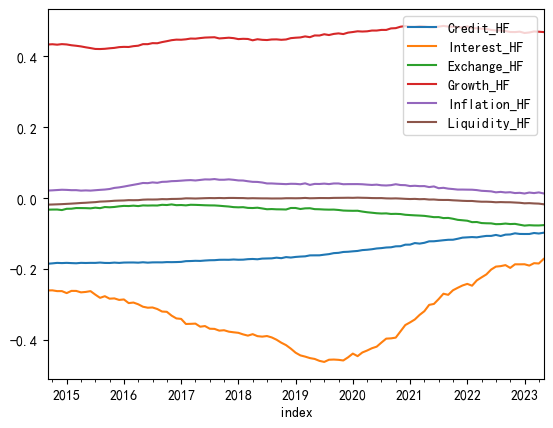

In [52]:
bench_exposure.dropna().plot()
bench_exposure.to_csv("./test_data/bench_exposure.csv")

In [1]:
# from Util_Fin import RP_solo_ver2_3
#使用风险平价策略作为基准？研报上说这回过多的暴露利率因子，暴露值的波动也会较大。

# 匹配因子的目标暴露

最优化目标:
$$
\argmin_{w} \Delta w'\Sigma \Delta w + (1-\lambda) ||w^TB_{N \times K}-T||_2 \\

s.t. \sum_{t=1}^N w_i = 1 \\
0 <w_i<1;-1<\Delta w_i<1



$$

In [32]:
import cvxpy as cp

In [ ]:
#以2023-05-30为基准，匹配因子暴露
B,R2_dict  = exposure_cal('2023-05-31')
B = B.values

计算2023-05-31的因子暴露


## 做多增长因子

In [98]:
#凸优化
weight_bench=np.array(list(benchmark_portfolio.values()))
n = len(weight_bench)
now_bench_exposure = np.array(bench_exposure.loc['2023-05-31'].values)
change_exposure = np.array([0,0,0,0.05,0,0])
target_exposure = change_exposure + now_bench_exposure
lambda_ = 0.1
sigma= ret_W_df[-52*3:].cov().values
w = cp.Variable(n)
w0 = weight_bench
T = target_exposure

delta_w = w - w0

#构造目标函数各部分
term1 = cp.quad_form(delta_w,sigma)
term2 = (1-lambda_)*cp.norm(B.T@w-T,2)
obj = cp.Minimize(term1+term2)

#定义约束
constraints = [
    cp.sum(w) == 1,
    w >= 0,
    w <= 1,
    delta_w >= -1,
    delta_w <= 1
]

#定义问题
problem = cp.Problem(obj,constraints)

In [99]:
result= problem.solve()

In [101]:
w.value

array([0.12753562, 0.08380723, 0.22119192, 0.2011011 , 0.10558526,
       0.07714486, 0.04200205, 0.04700453, 0.08179041, 0.01283702])

In [103]:
dw = (w.value - w0)

<BarContainer object of 10 artists>

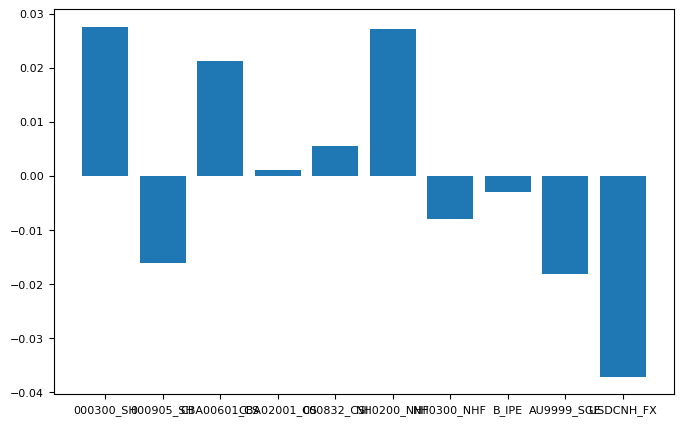

In [109]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(8,5))
plt.bar(list(benchmark_portfolio.keys()),dw)

在该策略组合下，因为认为未来经济会上行，那么策略会减配中证500，南华农产品以及美元，同时增配南华工业品，沪深300和国债。其中，中证500和国债的变动并不是直接受宏观因子变动而产生的，其本质是为了平衡其他因子暴露不变而进行的调整。

因子配置框架的目标是给定一个整体性的配置方案，只要求最终的组合暴露符合目标，并不能保证每种资产的权重都按照主观逻辑进行调整。

## 做多通胀因子

In [110]:
weight_bench=np.array(list(benchmark_portfolio.values()))
n = len(weight_bench)
now_bench_exposure = np.array(bench_exposure.loc['2023-05-31'].values)
change_exposure = np.array([0,0,0,0,0.05,0])
target_exposure = change_exposure + now_bench_exposure
lambda_ = 0.1
sigma= ret_W_df[-52*3:].cov().values
w = cp.Variable(n)
w0 = weight_bench
T = target_exposure

delta_w = w - w0

#构造目标函数各部分
term1 = cp.quad_form(delta_w,sigma)
term2 = (1-lambda_)*cp.norm(B.T@w-T,2)
obj = cp.Minimize(term1+term2)

#定义约束
constraints = [
    cp.sum(w) == 1,
    w >= 0,
    w <= 1,
    delta_w >= -1,
    delta_w <= 1
]

#定义问题
problem = cp.Problem(obj,constraints)

In [111]:
result= problem.solve()

<BarContainer object of 10 artists>

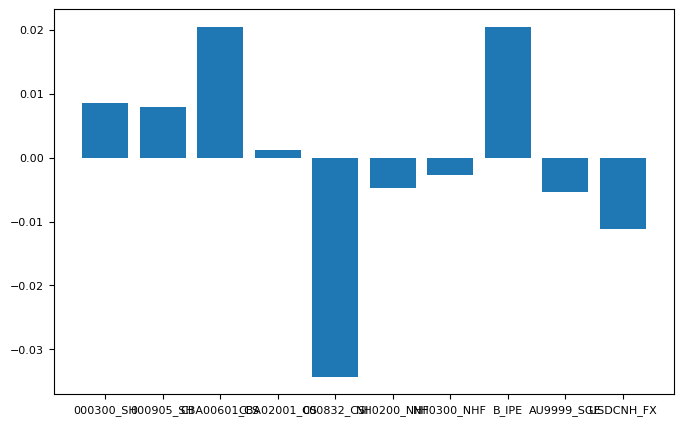

In [112]:
w.value
dw = (w.value - w0)
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(8,5))
plt.bar(list(benchmark_portfolio.keys()),dw)

## 做多利率因子

In [114]:
weight_bench=np.array(list(benchmark_portfolio.values()))
n = len(weight_bench)
now_bench_exposure = np.array(bench_exposure.loc['2023-05-31'].values)
change_exposure = np.array([0,0.05,0,0,0,0])
target_exposure = change_exposure + now_bench_exposure
lambda_ = 0.1
sigma= ret_W_df[-52*3:].cov().values
w = cp.Variable(n)
w0 = weight_bench
T = target_exposure

delta_w = w - w0

#构造目标函数各部分
term1 = cp.quad_form(delta_w,sigma)
term2 = (1-lambda_)*cp.norm(B.T@w-T,2)
obj = cp.Minimize(term1+term2)

#定义约束
constraints = [
    cp.sum(w) == 1,
    w >= 0,
    w <= 1,
    delta_w >= -1,
    delta_w <= 1
]

#定义问题
problem = cp.Problem(obj,constraints)

<BarContainer object of 10 artists>

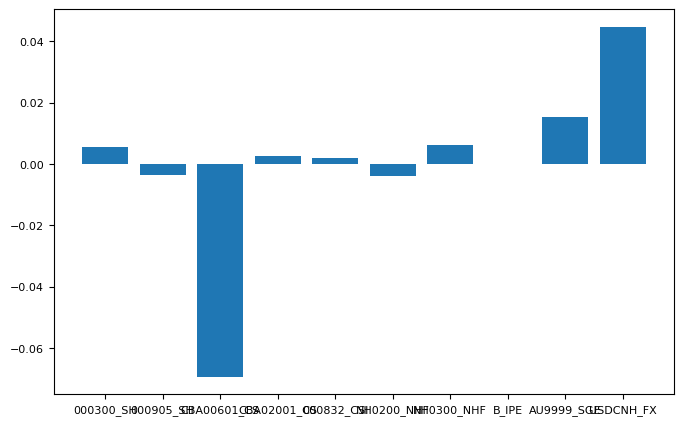

In [115]:
result= problem.solve()
w.value
dw = (w.value - w0)
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(8,5))
plt.bar(list(benchmark_portfolio.keys()),dw)


## 做多信用因子

In [116]:
weight_bench=np.array(list(benchmark_portfolio.values()))
n = len(weight_bench)
now_bench_exposure = np.array(bench_exposure.loc['2023-05-31'].values)
change_exposure = np.array([0.05,0,0,0,0,0])
target_exposure = change_exposure + now_bench_exposure
lambda_ = 0.1
sigma= ret_W_df[-52*3:].cov().values
w = cp.Variable(n)
w0 = weight_bench
T = target_exposure

delta_w = w - w0

#构造目标函数各部分
term1 = cp.quad_form(delta_w,sigma)
term2 = (1-lambda_)*cp.norm(B.T@w-T,2)
obj = cp.Minimize(term1+term2)

#定义约束
constraints = [
    cp.sum(w) == 1,
    w >= 0,
    w <= 1,
    delta_w >= -1,
    delta_w <= 1
]

#定义问题
problem = cp.Problem(obj,constraints)

<BarContainer object of 10 artists>

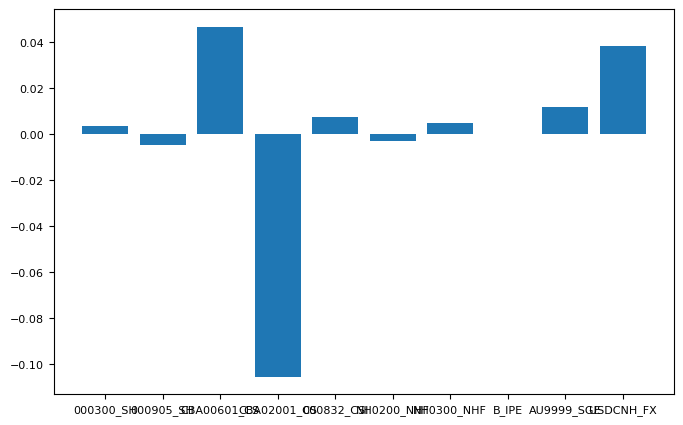

In [117]:
result= problem.solve()
w.value
dw = (w.value - w0)
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(8,5))
plt.bar(list(benchmark_portfolio.keys()),dw)


## 做多汇率因子

In [119]:
weight_bench=np.array(list(benchmark_portfolio.values()))
n = len(weight_bench)
now_bench_exposure = np.array(bench_exposure.loc['2023-05-31'].values)
change_exposure = np.array([0,0,0.05,0,0,0])
target_exposure = change_exposure + now_bench_exposure
lambda_ = 0.1
sigma= ret_W_df[-52*3:].cov().values
w = cp.Variable(n)
w0 = weight_bench
T = target_exposure

delta_w = w - w0

#构造目标函数各部分
term1 = cp.quad_form(delta_w,sigma)
term2 = (1-lambda_)*cp.norm(B.T@w-T,2)
obj = cp.Minimize(term1+term2)

#定义约束
constraints = [
    cp.sum(w) == 1,
    w >= 0,
    w <= 1,
    delta_w >= -1,
    delta_w <= 1
]

#定义问题
problem = cp.Problem(obj,constraints)

<BarContainer object of 10 artists>

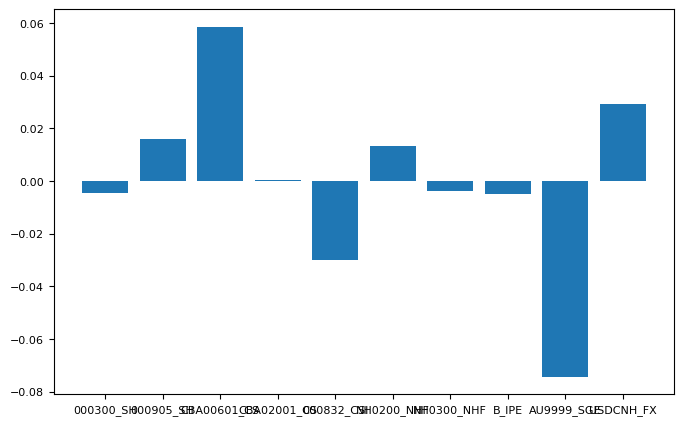

In [120]:
result= problem.solve()
w.value
dw = (w.value - w0)
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(8,5))
plt.bar(list(benchmark_portfolio.keys()),dw)


## 做多流动性因子

In [121]:
weight_bench=np.array(list(benchmark_portfolio.values()))
n = len(weight_bench)
now_bench_exposure = np.array(bench_exposure.loc['2023-05-31'].values)
change_exposure = np.array([0,0,0,0,0,0.05])
target_exposure = change_exposure + now_bench_exposure
lambda_ = 0.1
sigma= ret_W_df[-52*3:].cov().values
w = cp.Variable(n)
w0 = weight_bench
T = target_exposure

delta_w = w - w0

#构造目标函数各部分
term1 = cp.quad_form(delta_w,sigma)
term2 = (1-lambda_)*cp.norm(B.T@w-T,2)
obj = cp.Minimize(term1+term2)

#定义约束
constraints = [
    cp.sum(w) == 1,
    w >= 0,
    w <= 1,
    delta_w >= -1,
    delta_w <= 1
]

#定义问题
problem = cp.Problem(obj,constraints)

<BarContainer object of 10 artists>

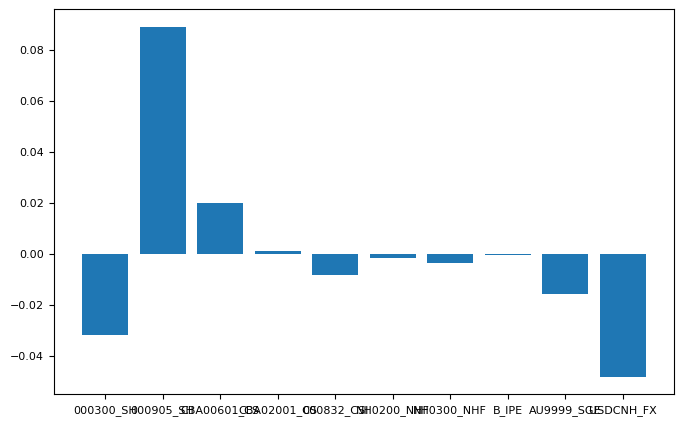

In [122]:
result= problem.solve()
w.value
dw = (w.value - w0)
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(8,5))
plt.bar(list(benchmark_portfolio.keys()),dw)